<a href="https://colab.research.google.com/github/Sofiiara/Projetos/blob/main/Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
df_covid = pd.read_csv("/content/covid_Regiao_3.csv", delimiter=";")
df_covid.head()

<ipython-input-366-53472ea1d326>:1: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid = pd.read_csv("/content/covid_Regiao_3.csv", delimiter=";")


,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,PERDIZES,0.084
1,M,4.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,0.0,PERDIZES,0.057
2,M,18.0,NaN,NaN,NaN,NaN,2.0,3.0,1.0,0.0,PERDIZES,0.084
3,F,73.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,PERDIZES,0.057
4,M,90.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,PERDIZES,0.081


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75299 entries, 0 to 75298
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sexo        3484 non-null   object 
 1   idade       3482 non-null   float64
 2   cardiopati  1815 non-null   float64
 3   diabetes    1553 non-null   float64
 4   renal       1302 non-null   float64
 5   obesidade   1288 non-null   float64
 6   uti         3141 non-null   float64
 7   suportvent  3155 non-null   float64
 8   evolucao    2964 non-null   float64
 9   covid       3484 non-null   float64
 10  distrito    3484 non-null   object 
 11  ivs         3484 non-null   float64
dtypes: float64(10), object(2)
memory usage: 6.9+ MB


In [ ]:
df_covid['cardiopati'].fillna(9, inplace=True)
df_covid['diabetes'].fillna(9, inplace=True)
df_covid['renal'].fillna(9, inplace=True)
df_covid['obesidade'].fillna(9, inplace=True)
df_covid['uti'].fillna(9, inplace=True)
df_covid['suportvent'].fillna(9, inplace=True)
df_covid['evolucao'].fillna(9, inplace=True)
df_covid.dropna(inplace=True)
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3482 entries, 0 to 3483
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sexo        3482 non-null   object 
 1   idade       3482 non-null   float64
 2   cardiopati  3482 non-null   float64
 3   diabetes    3482 non-null   float64
 4   renal       3482 non-null   float64
 5   obesidade   3482 non-null   float64
 6   uti         3482 non-null   float64
 7   suportvent  3482 non-null   float64
 8   evolucao    3482 non-null   float64
 9   covid       3482 non-null   float64
 10  distrito    3482 non-null   object 
 11  ivs         3482 non-null   float64
dtypes: float64(10), object(2)
memory usage: 353.6+ KB


In [ ]:
df_covid_num = df_covid

In [ ]:
cardiopati = {
    1: "sim",
    2: "não",
    9: "ignorado",
}
diabetes = {
    1: "sim",
    2: "não",
    9: "ignorado",
}
renal = {
    1: "sim",
    2: "não",
    9: "ignorado",
}
obesidade = {
    1: "sim",
    2: "não",
    9: "ignorado",
}
uti = {
    1: "sim",
    2: "não",
    9: "ignorado",
}
suportvent = {
    1: "invasivo",
    2: "não invasivo",
    3: "não",
    9: "ignorado",
}
evolucao = {
    1: "cura",
    2: "óbito",
    3: "óbito outra causa",
    9: "ignorado",
}
covid = {
    1: "sim",
    0: "outra causa",
}

In [ ]:
col_cardiopati = df_covid['cardiopati']
col_cardiopati = col_cardiopati.map(cardiopati)
df_covid['cardiopati'] = col_cardiopati
df_covid.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,ignorado,9.0,9.0,9.0,1.0,1.0,1.0,1.0,PERDIZES,0.084
1,M,4.0,ignorado,9.0,9.0,9.0,1.0,2.0,1.0,0.0,PERDIZES,0.057
2,M,18.0,ignorado,9.0,9.0,9.0,2.0,3.0,1.0,0.0,PERDIZES,0.084
3,F,73.0,não,1.0,2.0,2.0,1.0,1.0,1.0,1.0,PERDIZES,0.057
4,M,90.0,ignorado,9.0,9.0,9.0,1.0,1.0,2.0,1.0,PERDIZES,0.081


In [ ]:
col_diabetes = df_covid['diabetes']
col_diabetes = col_diabetes.map(diabetes)
df_covid['diabetes'] = col_diabetes
df_covid.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,ignorado,ignorado,9.0,9.0,1.0,1.0,1.0,1.0,PERDIZES,0.084
1,M,4.0,ignorado,ignorado,9.0,9.0,1.0,2.0,1.0,0.0,PERDIZES,0.057
2,M,18.0,ignorado,ignorado,9.0,9.0,2.0,3.0,1.0,0.0,PERDIZES,0.084
3,F,73.0,não,sim,2.0,2.0,1.0,1.0,1.0,1.0,PERDIZES,0.057
4,M,90.0,ignorado,ignorado,9.0,9.0,1.0,1.0,2.0,1.0,PERDIZES,0.081


In [ ]:
col_renal = df_covid['renal']
col_renal = col_renal.map(renal)
df_covid['renal'] = col_renal
df_covid.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,ignorado,ignorado,ignorado,9.0,1.0,1.0,1.0,1.0,PERDIZES,0.084
1,M,4.0,ignorado,ignorado,ignorado,9.0,1.0,2.0,1.0,0.0,PERDIZES,0.057
2,M,18.0,ignorado,ignorado,ignorado,9.0,2.0,3.0,1.0,0.0,PERDIZES,0.084
3,F,73.0,não,sim,não,2.0,1.0,1.0,1.0,1.0,PERDIZES,0.057
4,M,90.0,ignorado,ignorado,ignorado,9.0,1.0,1.0,2.0,1.0,PERDIZES,0.081


In [ ]:
col_obesidade = df_covid['obesidade']
col_obesidade = col_obesidade.map(obesidade)
df_covid['obesidade'] = col_obesidade
df_covid.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,ignorado,ignorado,ignorado,ignorado,1.0,1.0,1.0,1.0,PERDIZES,0.084
1,M,4.0,ignorado,ignorado,ignorado,ignorado,1.0,2.0,1.0,0.0,PERDIZES,0.057
2,M,18.0,ignorado,ignorado,ignorado,ignorado,2.0,3.0,1.0,0.0,PERDIZES,0.084
3,F,73.0,não,sim,não,não,1.0,1.0,1.0,1.0,PERDIZES,0.057
4,M,90.0,ignorado,ignorado,ignorado,ignorado,1.0,1.0,2.0,1.0,PERDIZES,0.081


In [ ]:
col_uti = df_covid['uti']
col_uti = col_uti.map(uti)
df_covid['uti'] = col_uti
df_covid.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,ignorado,ignorado,ignorado,ignorado,sim,1.0,1.0,1.0,PERDIZES,0.084
1,M,4.0,ignorado,ignorado,ignorado,ignorado,sim,2.0,1.0,0.0,PERDIZES,0.057
2,M,18.0,ignorado,ignorado,ignorado,ignorado,não,3.0,1.0,0.0,PERDIZES,0.084
3,F,73.0,não,sim,não,não,sim,1.0,1.0,1.0,PERDIZES,0.057
4,M,90.0,ignorado,ignorado,ignorado,ignorado,sim,1.0,2.0,1.0,PERDIZES,0.081


In [ ]:
col_suportvent = df_covid['suportvent']
col_suportvent = col_suportvent.map(suportvent)
df_covid['suportvent'] = col_suportvent
df_covid.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,ignorado,ignorado,ignorado,ignorado,sim,invasivo,1.0,1.0,PERDIZES,0.084
1,M,4.0,ignorado,ignorado,ignorado,ignorado,sim,não invasivo,1.0,0.0,PERDIZES,0.057
2,M,18.0,ignorado,ignorado,ignorado,ignorado,não,não,1.0,0.0,PERDIZES,0.084
3,F,73.0,não,sim,não,não,sim,invasivo,1.0,1.0,PERDIZES,0.057
4,M,90.0,ignorado,ignorado,ignorado,ignorado,sim,invasivo,2.0,1.0,PERDIZES,0.081


In [ ]:
col_evolucao = df_covid['evolucao']
col_evolucao = col_evolucao.map(evolucao)
df_covid['evolucao'] = col_evolucao
df_covid.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,ignorado,ignorado,ignorado,ignorado,sim,invasivo,cura,1.0,PERDIZES,0.084
1,M,4.0,ignorado,ignorado,ignorado,ignorado,sim,não invasivo,cura,0.0,PERDIZES,0.057
2,M,18.0,ignorado,ignorado,ignorado,ignorado,não,não,cura,0.0,PERDIZES,0.084
3,F,73.0,não,sim,não,não,sim,invasivo,cura,1.0,PERDIZES,0.057
4,M,90.0,ignorado,ignorado,ignorado,ignorado,sim,invasivo,óbito,1.0,PERDIZES,0.081


In [ ]:
col_covid = df_covid['covid']
col_covid = col_covid.map(covid)
df_covid['covid'] = col_covid
df_covid.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,F,55.0,ignorado,ignorado,ignorado,ignorado,sim,invasivo,cura,sim,PERDIZES,0.084
1,M,4.0,ignorado,ignorado,ignorado,ignorado,sim,não invasivo,cura,outra causa,PERDIZES,0.057
2,M,18.0,ignorado,ignorado,ignorado,ignorado,não,não,cura,outra causa,PERDIZES,0.084
3,F,73.0,não,sim,não,não,sim,invasivo,cura,sim,PERDIZES,0.057
4,M,90.0,ignorado,ignorado,ignorado,ignorado,sim,invasivo,óbito,sim,PERDIZES,0.081


# Análise das Variáveis Quantitativas

In [ ]:
df_covid[['idade','ivs']].describe()

,idade,ivs
count,3482.000000,3482.000000
mean,59.205342,0.225555
std,21.806415,0.113622
min,0.000000,0.040000
25%,46.000000,0.088000
50%,62.000000,0.287000
75%,76.000000,0.295000
max,106.000000,0.458000


In [ ]:
variancia_idade = df_covid['idade'].var()
print("Variância idade: ", variancia_idade)
variancia_ivs = df_covid['ivs'].var()
print("Variância ivs: ", variancia_ivs)

Variância idade:  475.51973014746005
Variância ivs:  0.01290996211789577


In [ ]:
assimetria_idade = df_covid['idade'].skew()
print('Assimetria(Skewness) idade: ', assimetria_idade)
assimetria_ivs = df_covid['ivs'].skew()
print('Assimetria(Skewness) ivs: ', assimetria_ivs)


Assimetria(Skewness) idade:  -0.6358324786575935
Assimetria(Skewness) ivs:  -0.37357919475657814


In [ ]:
curtose_idade = df_covid['idade'].kurtosis()
print('Curtose idade:', curtose_idade)
curtose_ivs = df_covid['ivs'].kurtosis()
print('Curtose ivs: ', curtose_ivs)

Curtose idade: 0.07285556781576874
Curtose ivs:  -1.3780449610282155


<Axes: title={'center': 'Boxplot da Variável Idade'}, xlabel='anos'>

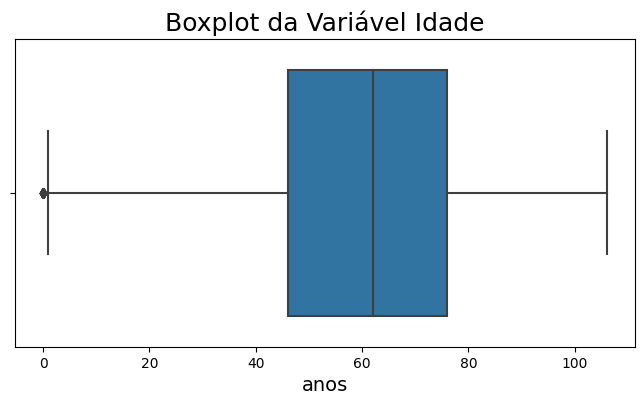

In [ ]:
ax = sns.boxplot(x = 'idade', data = df_covid)
ax.figure.set_size_inches(8, 4)

ax.set_title('Boxplot da Variável Idade', fontsize = 18)

ax.set_xlabel('anos', fontsize = 14)

ax

<Axes: title={'center': 'Boxplot da Variável Vulnerabilidade Social'}, xlabel='Índice'>

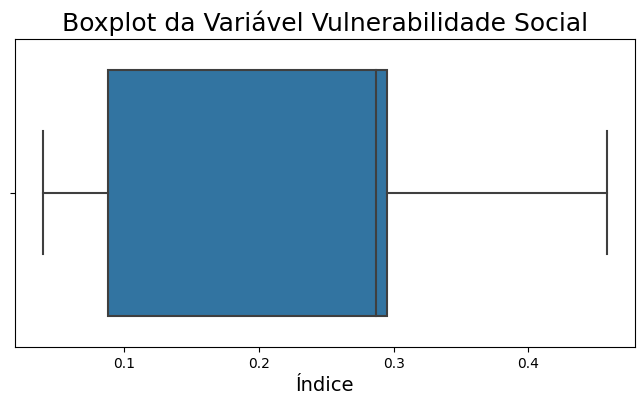

In [ ]:
ax = sns.boxplot(x = 'ivs', data = df_covid)
ax.figure.set_size_inches(8, 4)

ax.set_title('Boxplot da Variável Vulnerabilidade Social', fontsize = 18)

ax.set_xlabel('Índice', fontsize = 14)

ax

<Axes: title={'center': 'Histograma da Variável Idade'}, xlabel='Idade'>

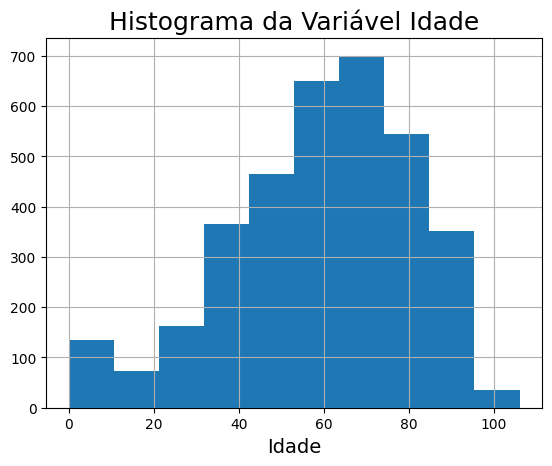

In [ ]:
ax = df_covid.idade.hist()

ax.set_title('Histograma da Variável Idade', fontsize = 18)

ax.set_xlabel('Idade', fontsize = 14)

ax

<Axes: title={'center': 'Histograma da Variável Vulnerabilidade Social'}, xlabel='Índice'>

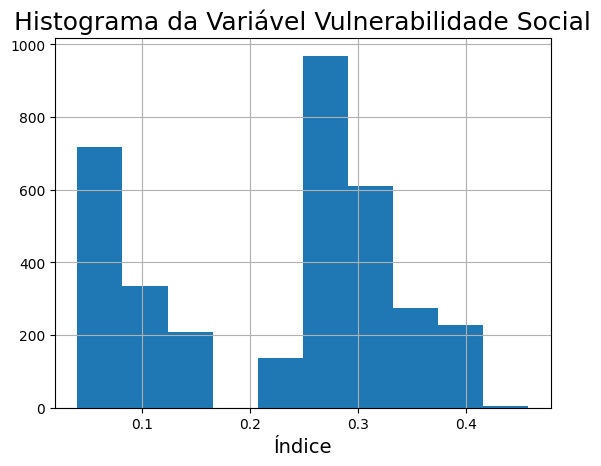

In [ ]:
ax = df_covid.ivs.hist()

ax.set_title('Histograma da Variável Vulnerabilidade Social', fontsize = 18)

ax.set_xlabel('Índice', fontsize = 14)

ax

#Análise das variáveis qualitativas


In [ ]:
def calcular_frequencias(data):
    # Frequência absoluta
    freq_abs = data.value_counts()

    # Frequência relativa
    freq_rel = data.value_counts(normalize=True)*100

    # Frequência acumulada
    freq_acum = freq_abs.cumsum()

    # Criar um DataFrame para mostrar os resultados
    df = pd.DataFrame({'Frequência Absoluta': freq_abs,
                       'Frequência Relativa (%)': freq_rel,
                       'Frequência Acumulada': freq_acum})

    return df

In [ ]:
def plotar_frequencia_absoluta(df):
    # Criar uma figura e um conjunto de subtramas
    fig, ax = plt.subplots()

    # Criar um gráfico de barras com a frequência absoluta
    ax.bar(df.index, df['Frequência Absoluta'])

    # Adicionar títulos e rótulos
    ax.set_title('Gráfico de Barras da Frequência Absoluta')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência Absoluta')

    # Mostrar o gráfico
    plt.show()

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['sexo'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
M,1820,52.268811,1820
F,1662,47.731189,3482


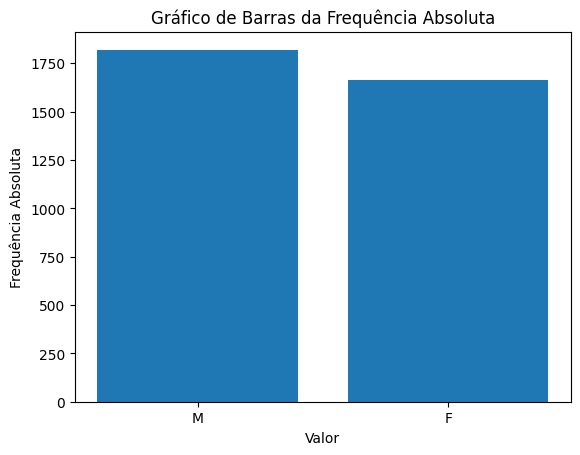

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['cardiopati'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
ignorado,1685,48.391729,1685
sim,1301,37.363584,2986
não,496,14.244687,3482


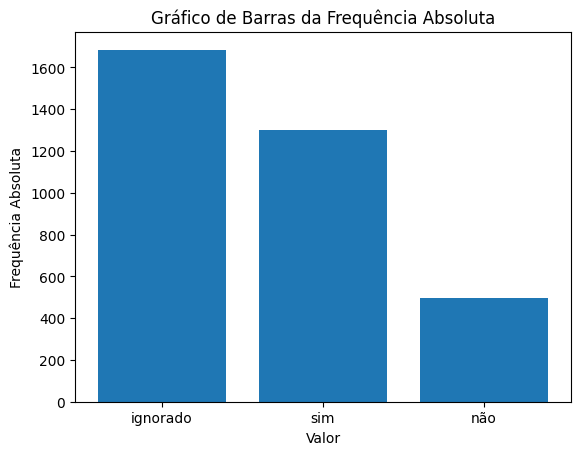

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['diabetes'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
ignorado,1960,56.289489,1960
sim,780,22.400919,2740
não,742,21.309592,3482


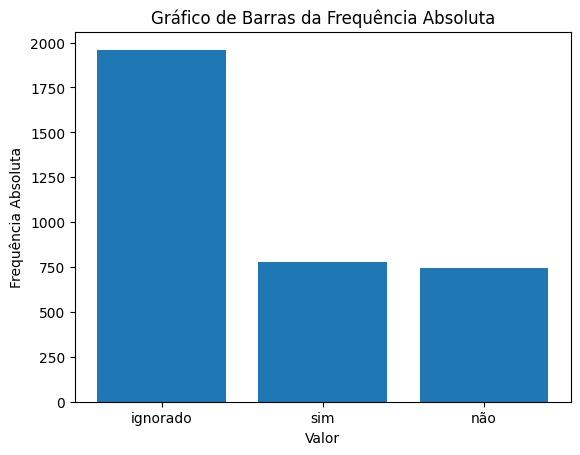

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['renal'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
ignorado,2220,63.756462,2220
não,1086,31.188972,3306
sim,176,5.054566,3482


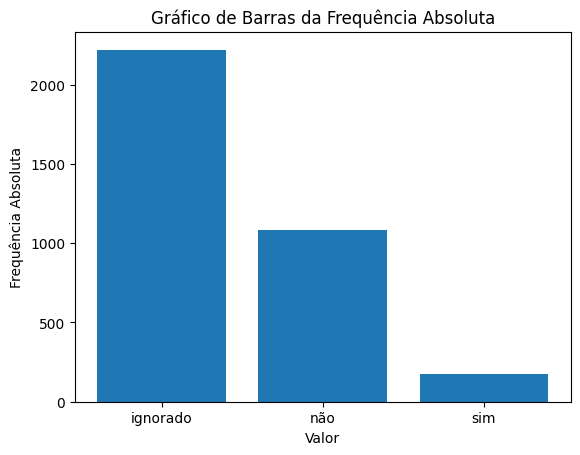

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['obesidade'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
ignorado,2271,65.221137,2271
não,1071,30.758185,3342
sim,140,4.020678,3482


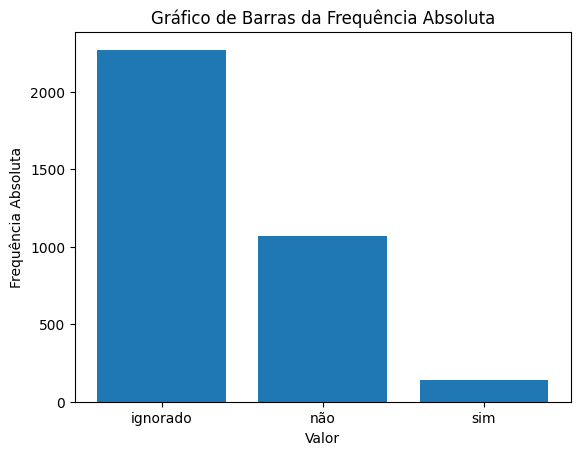

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['uti'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
não,1908,54.796094,1908
sim,1091,31.332567,2999
ignorado,483,13.871338,3482


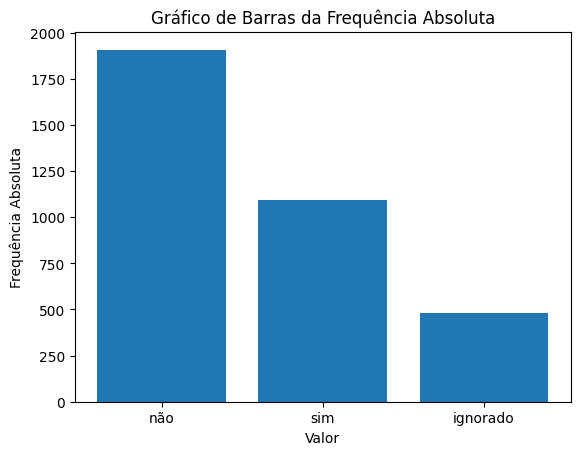

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['suportvent'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
não invasivo,1418,40.723722,1418
não,1087,31.217691,2505
ignorado,514,14.761631,3019
invasivo,463,13.296956,3482


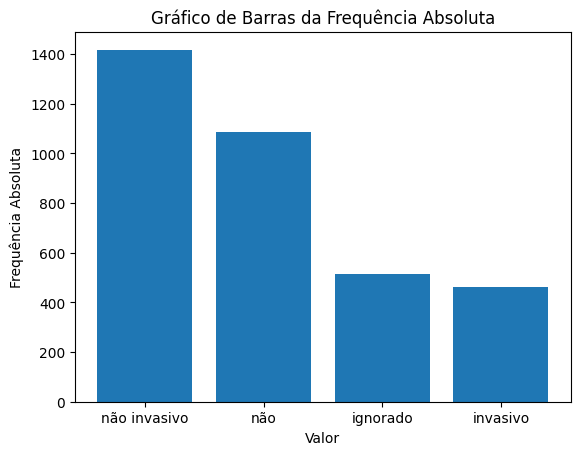

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['evolucao'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
cura,2163,62.119472,2163
óbito,766,21.998851,2929
ignorado,545,15.651924,3474
óbito outra causa,8,0.229753,3482


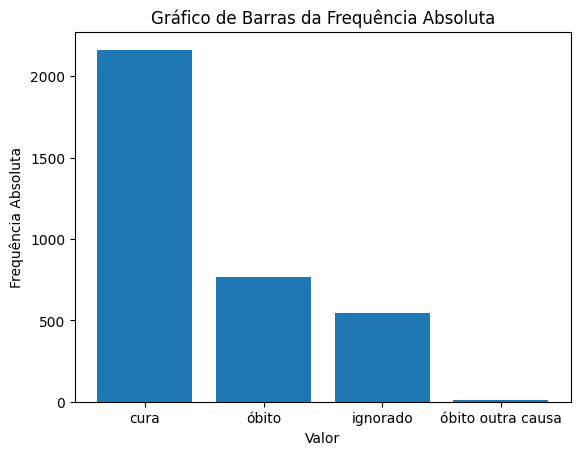

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['covid'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
sim,1855,53.27398,1855
outra causa,1627,46.72602,3482


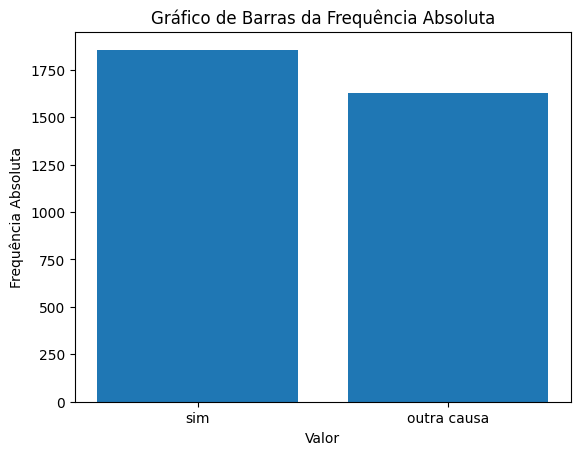

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

In [ ]:
dist_freq_qualitativas = calcular_frequencias(df_covid['distrito'])
dist_freq_qualitativas

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
PIRITUBA,1100,31.591040,1100
PONTE RASA,702,20.160827,1802
PERDIZES,656,18.839747,2458
PERUS,610,17.518667,3068
PINHEIROS,414,11.889719,3482


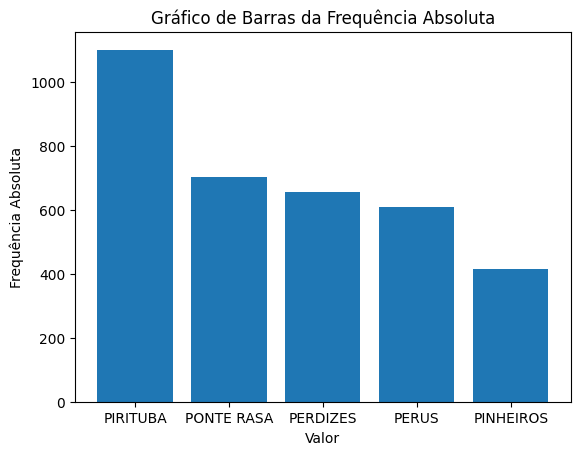

In [ ]:
plotar_frequencia_absoluta(dist_freq_qualitativas)

#Análise das duas variáveis quantitativas

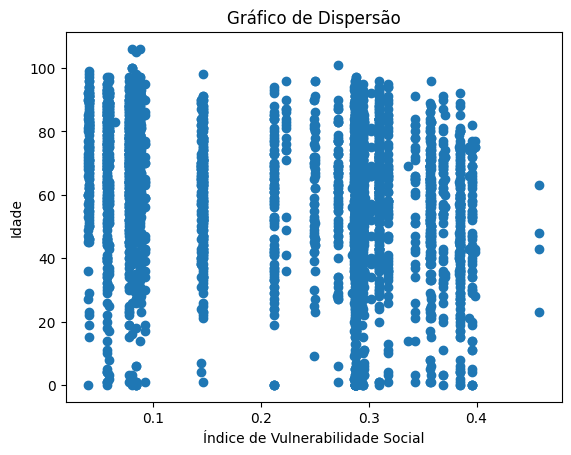

In [ ]:
#Criar uma figura e um conjunto de subtramas
fig, ax = plt.subplots()
#Criar um gráfico de dispersão com idade e ivs
ax.scatter(df_covid['ivs'], df_covid['idade'])
#Adicionar títulos e rótulos
ax.set_title('Gráfico de Dispersão')
ax.set_xlabel('Índice de Vulnerabilidade Social')
ax.set_ylabel('Idade')
#Mostrar o gráfico
plt.show()

In [ ]:
df_quant = df_covid[['idade', 'ivs']]
df_quant.corr(method='pearson')

,idade,ivs
idade,1.000000,-0.238541
ivs,-0.238541,1.000000


In [ ]:
pd.crosstab(pd.cut(df_covid['idade'], bins=5), pd.cut(df_covid['ivs'], bins=5))

ivs,"(0.0396, 0.124]","(0.124, 0.207]","(0.207, 0.291]","(0.291, 0.374]","(0.374, 0.458]"
idade,,,,,
"(-0.106, 21.2]",44,4,78,51,31
"(21.2, 42.4]",103,38,177,152,58
"(42.4, 63.6]",242,70,391,324,87
"(63.6, 84.8]",436,78,374,305,51
"(84.8, 106.0]",227,18,87,52,4


#Análise de duas variáveis qualitativas

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['cardiopati'])

cardiopati,ignorado,não,sim
sexo,,,
F,787,230,645
M,898,266,656


Text(0.5, 1.0, 'Quantidade de Pacientes por Cardiopatia e Gênero')

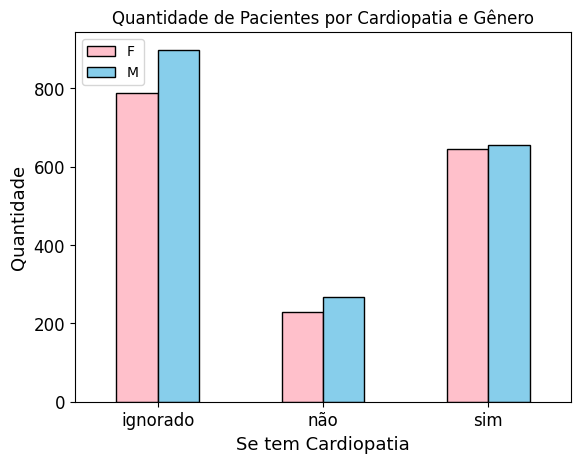

In [ ]:
sexo_cardiopati = (df_covid[['cardiopati','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se tem Cardiopatia', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Cardiopatia e Gênero")

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['diabetes'])

diabetes,ignorado,não,sim
sexo,,,
F,933,361,368
M,1027,381,412


Text(0.5, 1.0, 'Quantidade de Pacientes por Diabetes e Gênero')

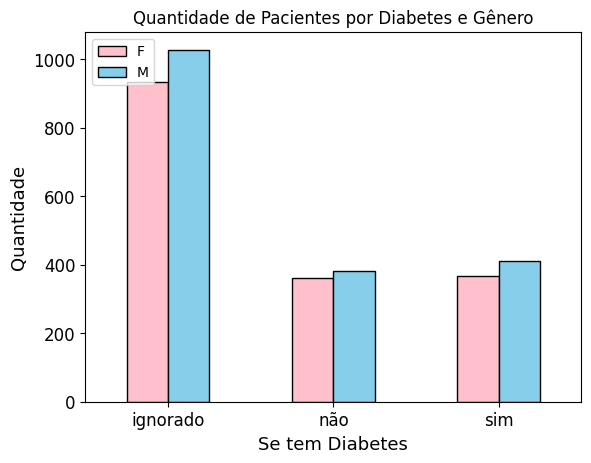

In [ ]:
sexo_cardiopati = (df_covid[['diabetes','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se tem Diabetes', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Diabetes e Gênero")

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['renal'])

renal,ignorado,não,sim
sexo,,,
F,1072,518,72
M,1148,568,104


Text(0.5, 1.0, 'Quantidade de Pacientes por Renal e Gênero')

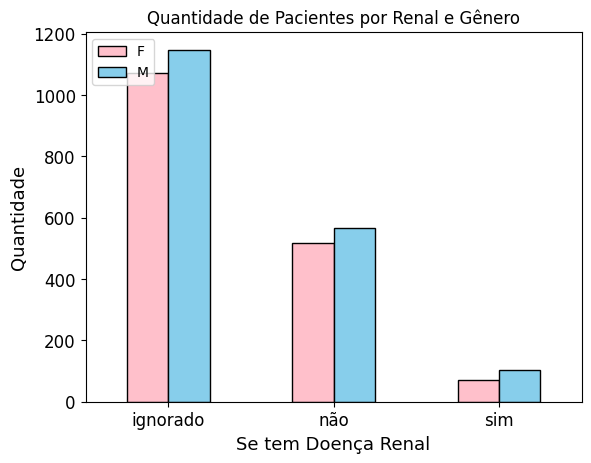

In [ ]:
sexo_cardiopati = (df_covid[['renal','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se tem Doença Renal', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Renal e Gênero")

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['obesidade'])

obesidade,ignorado,não,sim
sexo,,,
F,1096,513,53
M,1175,558,87


Text(0.5, 1.0, 'Quantidade de Pacientes por Obesidade e Gênero')

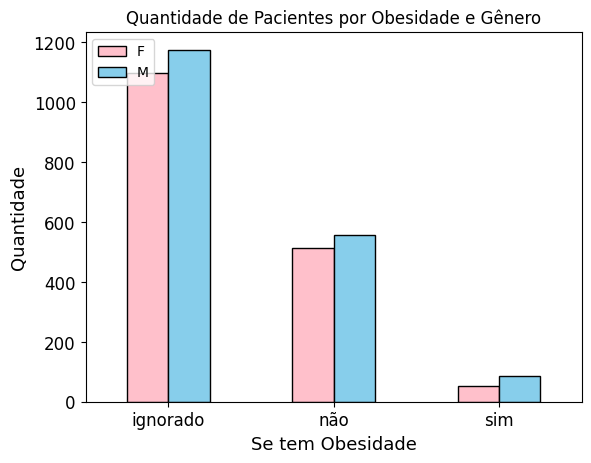

In [ ]:
sexo_cardiopati = (df_covid[['obesidade','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se tem Obesidade', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Obesidade e Gênero")

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['uti'])

uti,ignorado,não,sim
sexo,,,
F,232,906,524
M,251,1002,567


Text(0.5, 1.0, 'Quantidade de Pacientes por UTI e Gênero')

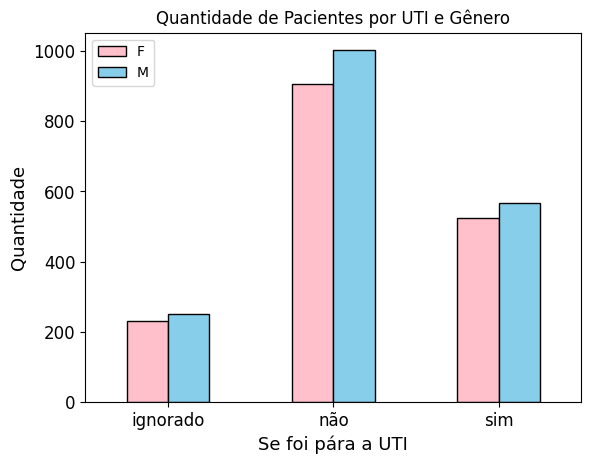

In [ ]:
sexo_cardiopati = (df_covid[['uti','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se foi pára a UTI', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por UTI e Gênero")

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['suportvent'])

suportvent,ignorado,invasivo,não,não invasivo
sexo,,,,
F,250,224,531,657
M,264,239,556,761


Text(0.5, 1.0, 'Quantidade de Pacientes por Suporte Ventilatório e Gênero')

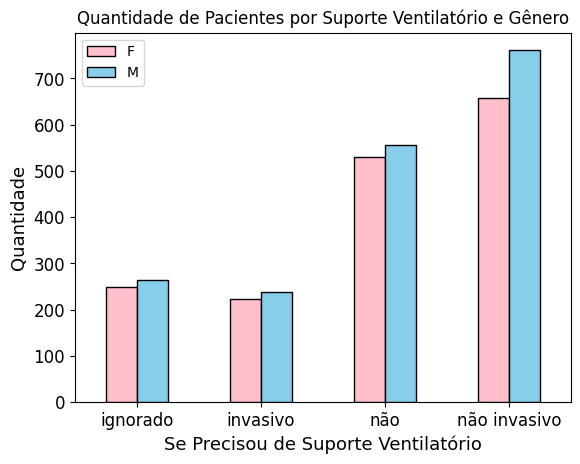

In [ ]:
sexo_cardiopati = (df_covid[['suportvent','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se Precisou de Suporte Ventilatório', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Suporte Ventilatório e Gênero")

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
sexo,,,,
F,1039,264,358,1
M,1124,281,408,7


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Gênero')

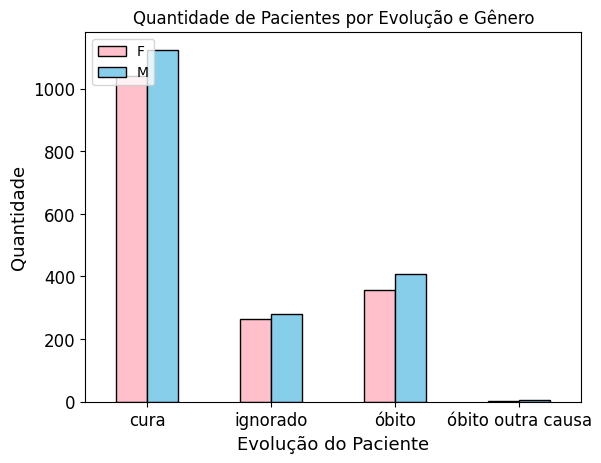

In [ ]:
sexo_cardiopati = (df_covid[['evolucao','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Evolução do Paciente', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Gênero")

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['covid'])

covid,outra causa,sim
sexo,,
F,830,832
M,797,1023


Text(0.5, 1.0, 'Quantidade de Pacientes por Covid e Gênero')

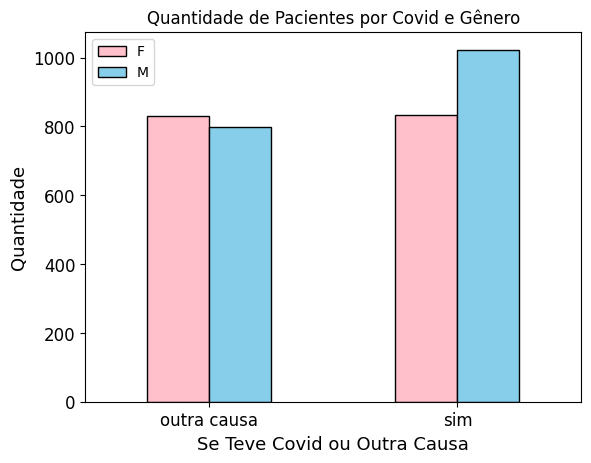

In [ ]:
sexo_cardiopati = (df_covid[['covid','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se Teve Covid ou Outra Causa', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Covid e Gênero")

In [ ]:
pd.crosstab(df_covid['sexo'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
sexo,,,,,
F,334,285,215,515,313
M,322,325,199,585,389


Text(0.5, 1.0, 'Quantidade de Pacientes por Distrito e Gênero')

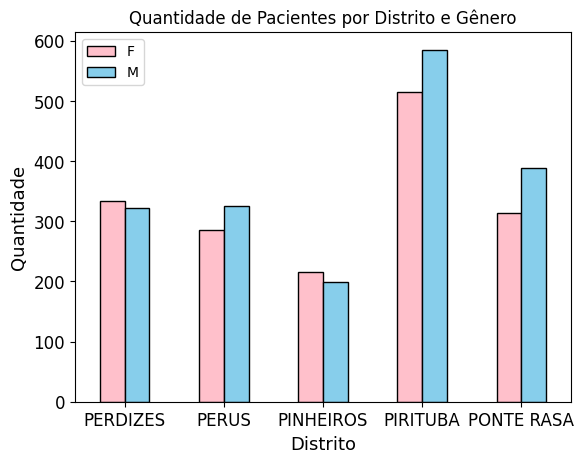

In [ ]:
sexo_cardiopati = (df_covid[['distrito','sexo']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['pink','#87CEEB'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Distrito e Gênero")

In [ ]:
pd.crosstab(df_covid['cardiopati'],df_covid['diabetes'])

diabetes,ignorado,não,sim
cardiopati,,,
ignorado,1569,2,114
não,2,346,148
sim,389,394,518


Text(0.5, 1.0, 'Quantidade de Pacientes por Diabetes e Cardiopatia')

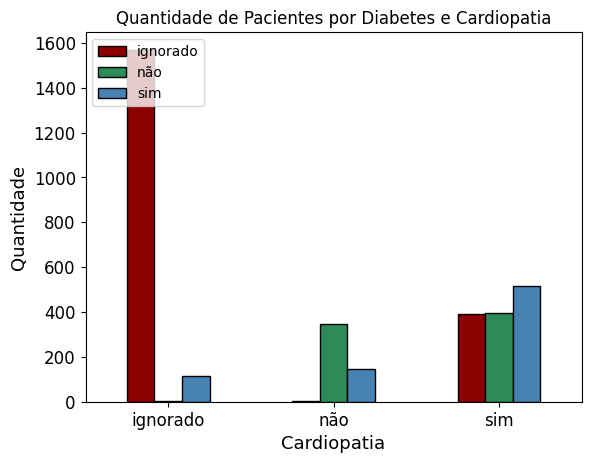

In [ ]:
sexo_cardiopati = (df_covid[['cardiopati','diabetes']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cardiopatia', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Diabetes e Cardiopatia")

In [ ]:
pd.crosstab(df_covid['cardiopati'],df_covid['renal'])

renal,ignorado,não,sim
cardiopati,,,
ignorado,1650,4,31
não,7,452,37
sim,563,630,108


Text(0.5, 1.0, 'Quantidade de Pacientes por Renal e Cardiopatia')

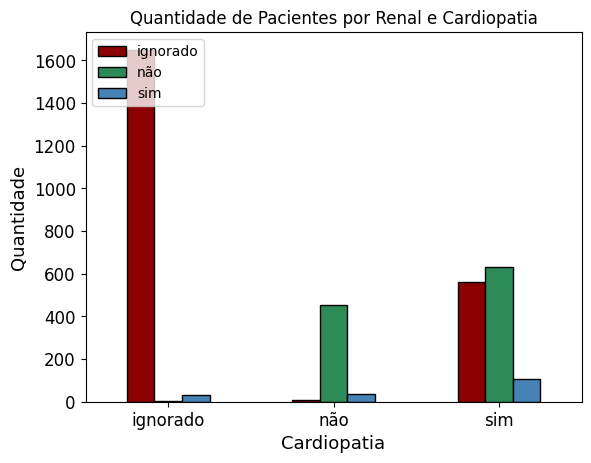

In [ ]:
sexo_cardiopati = (df_covid[['cardiopati','renal']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cardiopatia', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Renal e Cardiopatia")

In [ ]:
pd.crosstab(df_covid['cardiopati'],df_covid['obesidade'])

obesidade,ignorado,não,sim
cardiopati,,,
ignorado,1653,5,27
não,17,433,46
sim,601,633,67


Text(0.5, 1.0, 'Quantidade de Pacientes por Obesidade e Cardiopatia')

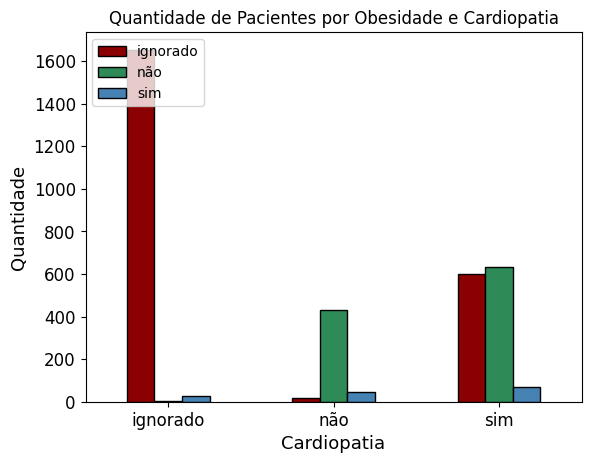

In [ ]:
sexo_cardiopati = (df_covid[['cardiopati','obesidade']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cardiopatia', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Obesidade e Cardiopatia")

In [ ]:
pd.crosstab(df_covid['cardiopati'],df_covid['uti'])

uti,ignorado,não,sim
cardiopati,,,
ignorado,293,934,458
não,42,296,158
sim,148,678,475


Text(0.5, 1.0, 'Quantidade de Pacientes por UTI e Cardiopatia')

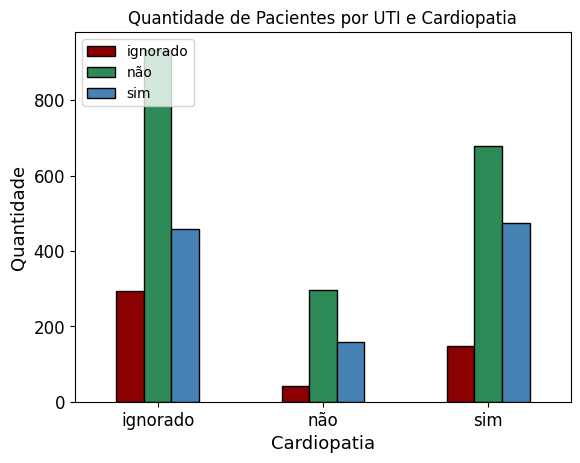

In [ ]:
sexo_cardiopati = (df_covid[['cardiopati','uti']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cardiopatia', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por UTI e Cardiopatia")

In [ ]:
pd.crosstab(df_covid['cardiopati'],df_covid['suportvent'])

suportvent,ignorado,invasivo,não,não invasivo
cardiopati,,,,
ignorado,315,178,581,611
não,56,69,179,192
sim,143,216,327,615


Text(0.5, 1.0, 'Quantidade de Pacientes por Suporte Ventilatório e Cardiopatia')

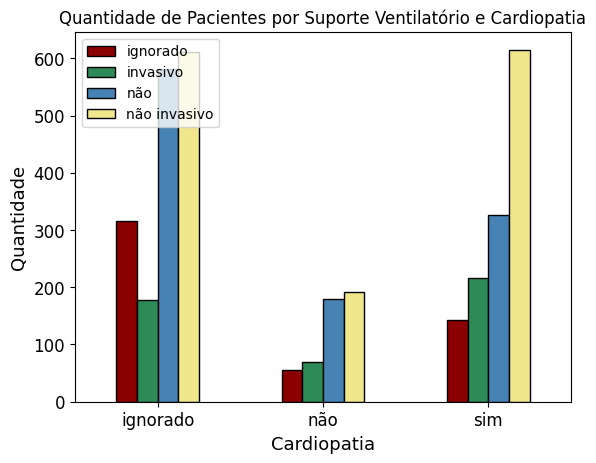

In [ ]:
sexo_cardiopati = (df_covid[['cardiopati','suportvent']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cardiopatia', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Suporte Ventilatório e Cardiopatia")

In [ ]:
pd.crosstab(df_covid['cardiopati'],df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
cardiopati,,,,
ignorado,1160,272,252,1
não,284,75,135,2
sim,719,198,379,5


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Cardiopatia')

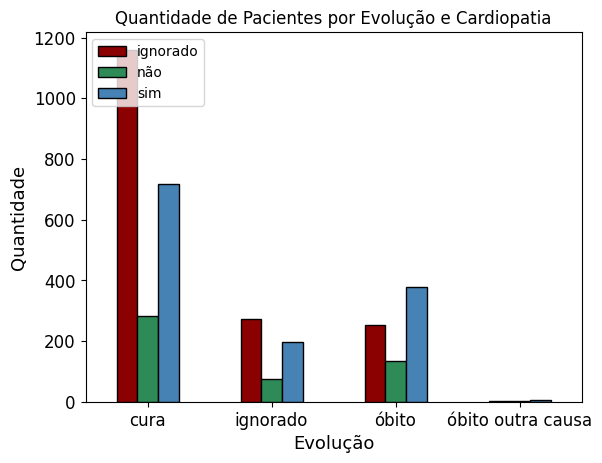

In [ ]:
sexo_cardiopati = (df_covid[['evolucao','cardiopati']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Evolução', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Cardiopatia")

In [ ]:
pd.crosstab(df_covid['cardiopati'],df_covid['covid'])

covid,outra causa,sim
cardiopati,,
ignorado,816,869
não,236,260
sim,575,726


Text(0.5, 1.0, 'Quantidade de Pacientes por Covid e Cardiopatia')

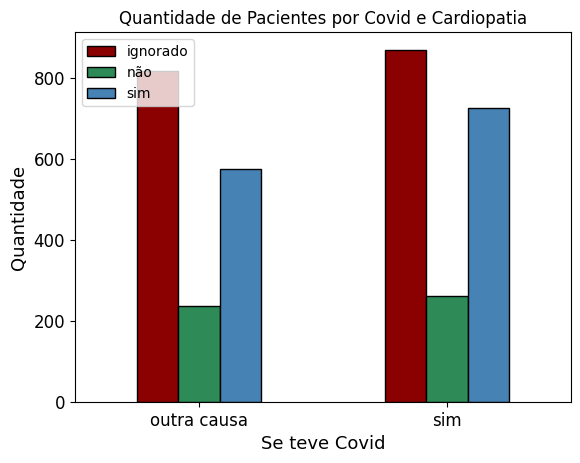

In [ ]:
sexo_cardiopati = (df_covid[['covid','cardiopati']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se teve Covid', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Covid e Cardiopatia")

In [ ]:
pd.crosstab(df_covid['cardiopati'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
cardiopati,,,,,
ignorado,293,304,204,534,350
não,74,109,46,166,101
sim,289,197,164,400,251


Text(0.5, 1.0, 'Quantidade de Pacientes por Distrito e Cardiopatia')

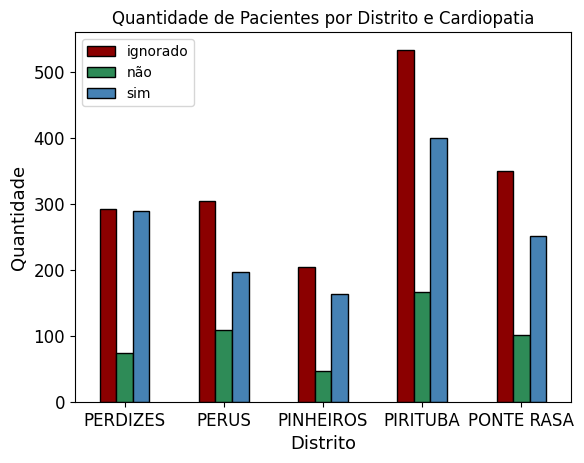

In [ ]:
sexo_cardiopati = (df_covid[['distrito','cardiopati']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Distrito e Cardiopatia")

In [ ]:
pd.crosstab(df_covid['diabetes'],df_covid['renal'])

renal,ignorado,não,sim
diabetes,,,
ignorado,1905,5,50
não,14,681,47
sim,301,400,79


Text(0.5, 1.0, 'Quantidade de Pacientes por Renal e Diabetes')

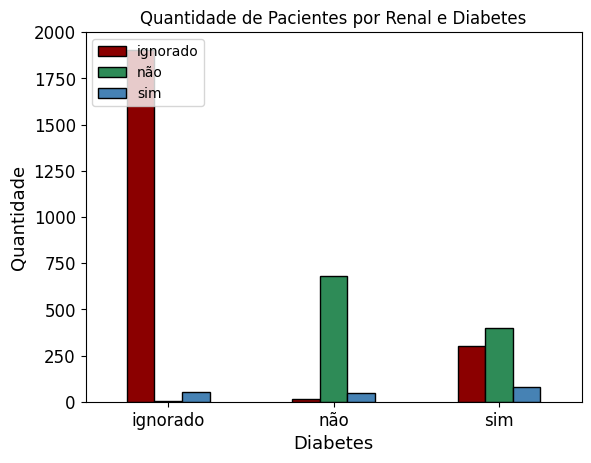

In [ ]:
sexo_cardiopati = (df_covid[['diabetes','renal']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Diabetes', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Renal e Diabetes")

In [ ]:
pd.crosstab(df_covid['diabetes'],df_covid['obesidade'])

obesidade,ignorado,não,sim
diabetes,,,
ignorado,1916,10,34
não,29,654,59
sim,326,407,47


Text(0.5, 1.0, 'Quantidade de Pacientes por Obesidade e Diabetes')

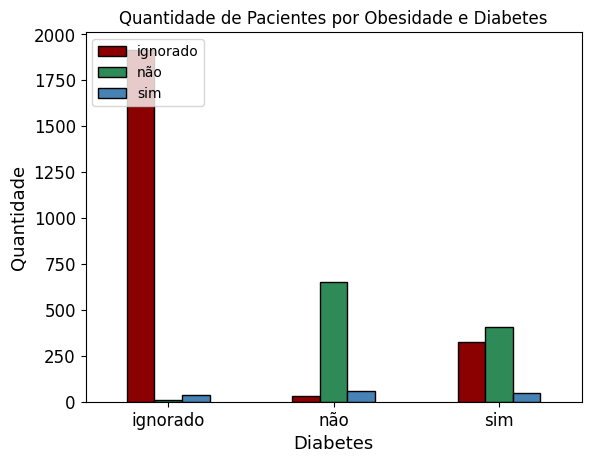

In [ ]:
sexo_cardiopati = (df_covid[['diabetes','obesidade']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Diabetes', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Obesidade e Diabetes")

In [ ]:
pd.crosstab(df_covid['diabetes'],df_covid['uti'])

uti,ignorado,não,sim
diabetes,,,
ignorado,319,1082,559
não,62,431,249
sim,102,395,283


Text(0.5, 1.0, 'Quantidade de Pacientes por UTI e Diabetes')

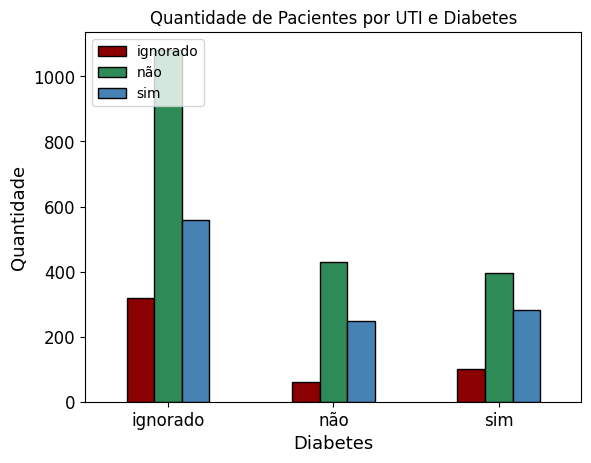

In [ ]:
sexo_cardiopati = (df_covid[['diabetes','uti']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Diabetes', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por UTI e Diabetes")

In [ ]:
pd.crosstab(df_covid['diabetes'],df_covid['suportvent'])

suportvent,ignorado,invasivo,não,não invasivo
diabetes,,,,
ignorado,342,227,634,757
não,72,105,269,296
sim,100,131,184,365


Text(0.5, 1.0, 'Quantidade de Pacientes por Suporte Ventilatório e Diabetes')

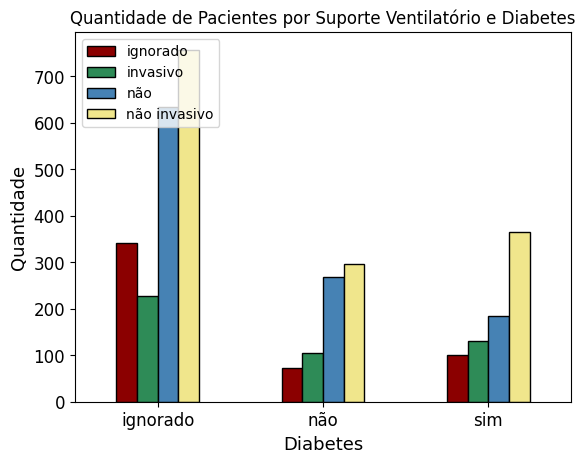

In [ ]:
sexo_cardiopati = (df_covid[['diabetes','suportvent']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Diabetes', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Suporte Ventilatório e Diabetes")

In [ ]:
pd.crosstab(df_covid['diabetes'],df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
diabetes,,,,
ignorado,1314,310,333,3
não,417,102,220,3
sim,432,133,213,2


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Diabetes')

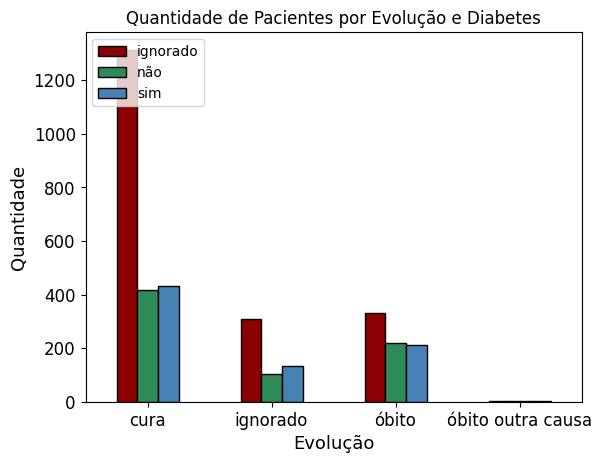

In [ ]:
sexo_cardiopati = (df_covid[['evolucao','diabetes']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Evolução', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Diabetes")

In [ ]:
pd.crosstab(df_covid['diabetes'],df_covid['covid'])

covid,outra causa,sim
diabetes,,
ignorado,934,1026
não,368,374
sim,325,455


Text(0.5, 1.0, 'Quantidade de Pacientes por Covid e Diabetes')

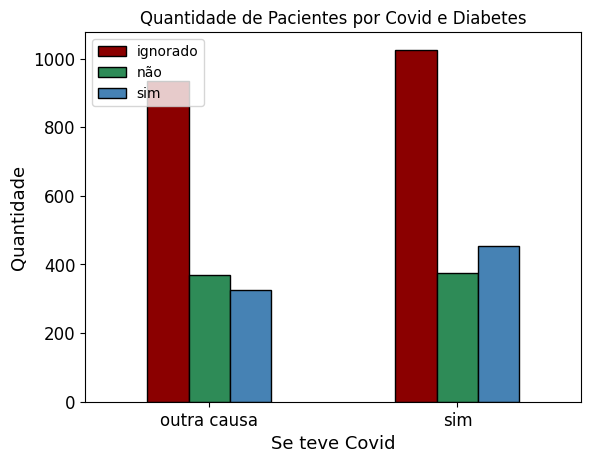

In [ ]:
sexo_cardiopati = (df_covid[['covid','diabetes']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se teve Covid', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Covid e Diabetes")

In [ ]:
pd.crosstab(df_covid['diabetes'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
diabetes,,,,,
ignorado,385,323,249,592,411
não,143,129,76,273,121
sim,128,158,89,235,170


Text(0.5, 1.0, 'Quantidade de Pacientes por Distrito e Diabetes')

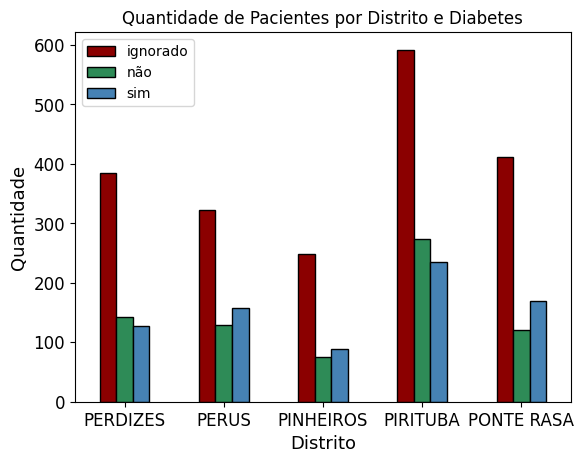

In [ ]:
sexo_cardiopati = (df_covid[['distrito','diabetes']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Distrito e Diabetes")

In [ ]:
pd.crosstab(df_covid['renal'],df_covid['obesidade'])

obesidade,ignorado,não,sim
renal,,,
ignorado,2157,20,43
não,37,962,87
sim,77,89,10


Text(0.5, 1.0, 'Quantidade de Pacientes por Obesidade e Renal')

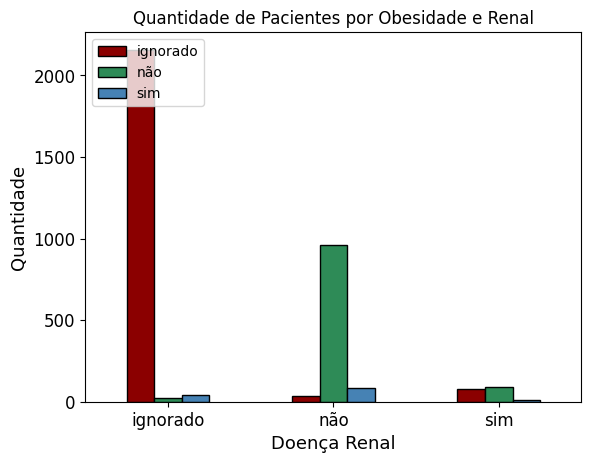

In [ ]:
sexo_cardiopati = (df_covid[['renal','obesidade']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Doença Renal', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Obesidade e Renal")

In [ ]:
pd.crosstab(df_covid['renal'],df_covid['uti'])

uti,ignorado,não,sim
renal,,,
ignorado,374,1210,636
não,91,620,375
sim,18,78,80


Text(0.5, 1.0, 'Quantidade de Pacientes por UTI e Renal')

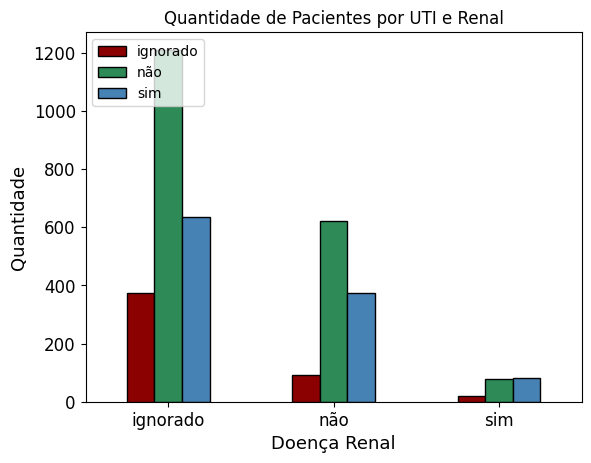

In [ ]:
sexo_cardiopati = (df_covid[['renal','uti']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Doença Renal', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por UTI e Renal")

In [ ]:
pd.crosstab(df_covid['renal'],df_covid['suportvent'])

suportvent,ignorado,invasivo,não,não invasivo
renal,,,,
ignorado,390,255,688,887
não,105,169,352,460
sim,19,39,47,71


Text(0.5, 1.0, 'Quantidade de Pacientes por Suporte Ventilatório e Renal')

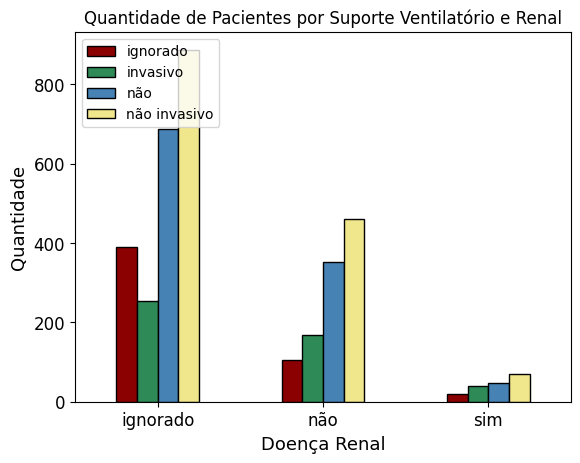

In [ ]:
sexo_cardiopati = (df_covid[['renal','suportvent']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Doença Renal', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Suporte Ventilatório e Renal")

In [ ]:
pd.crosstab(df_covid['renal'],df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
renal,,,,
ignorado,1469,358,390,3
não,617,156,311,2
sim,77,31,65,3


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Renal')

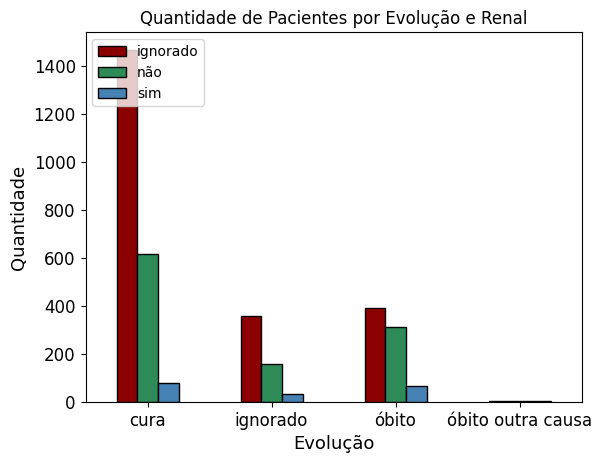

In [ ]:
sexo_cardiopati = (df_covid[['evolucao','renal']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Evolução', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Renal")

In [ ]:
pd.crosstab(df_covid['renal'],df_covid['covid'])

covid,outra causa,sim
renal,,
ignorado,1036,1184
não,502,584
sim,89,87


Text(0.5, 1.0, 'Quantidade de Pacientes por Covid e Renal')

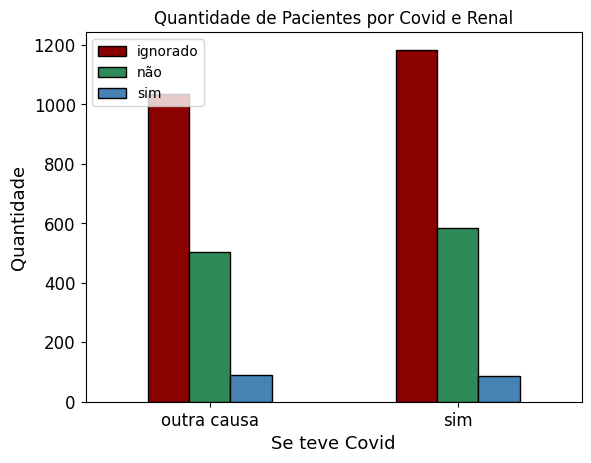

In [ ]:
sexo_cardiopati = (df_covid[['covid','renal']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Se teve Covid', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Covid e Renal")

In [ ]:
pd.crosstab(df_covid['renal'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
renal,,,,,
ignorado,430,382,284,658,466
não,200,207,103,389,187
sim,26,21,27,53,49


Text(0.5, 1.0, 'Quantidade de Pacientes por Distrito e Renal')

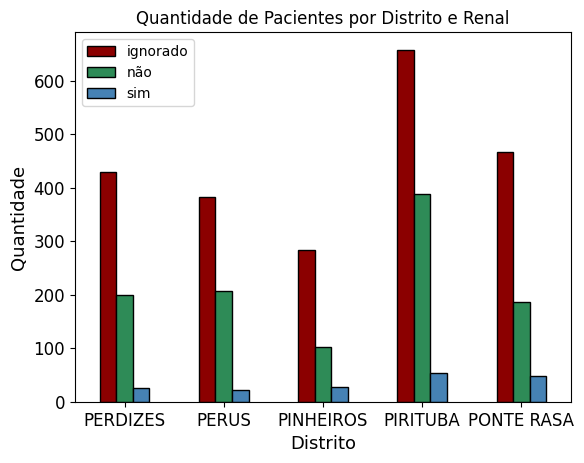

In [ ]:
sexo_cardiopati = (df_covid[['distrito','renal']].value_counts())
sexo_cardiopati
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Distrito e Renal")

In [ ]:
pd.crosstab(df_covid['obesidade'],df_covid['uti'])

uti,ignorado,não,sim
obesidade,,,
ignorado,385,1235,651
não,89,607,375
sim,9,66,65


Text(0.5, 1.0, 'Quantidade de Pacientes por UTI e Obesidade')

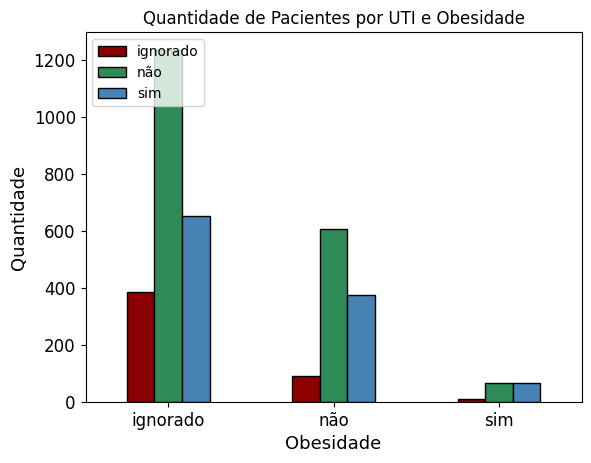

In [ ]:
sexo_cardiopati = (df_covid[['obesidade','uti']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Obesidade', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por UTI e Obesidade")

In [ ]:
pd.crosstab(df_covid['obesidade'],df_covid['suportvent'])

suportvent,ignorado,invasivo,não,não invasivo
obesidade,,,,
ignorado,399,261,697,914
não,104,173,358,436
sim,11,29,32,68


Text(0.5, 1.0, 'Quantidade de Pacientes por Suporte Ventilatório e Obesidade')

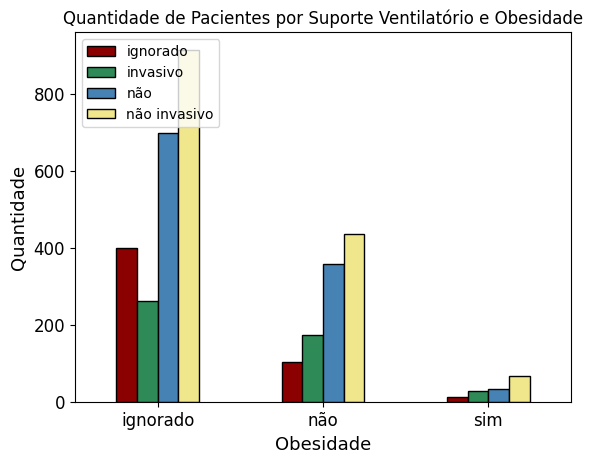

In [ ]:
sexo_cardiopati = (df_covid[['obesidade','suportvent']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Obesidade', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Suporte Ventilatório e Obesidade")

In [ ]:
pd.crosstab(df_covid['obesidade'],df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
obesidade,,,,
ignorado,1494,363,411,3
não,583,160,323,5
sim,86,22,32,0


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Obesidade')

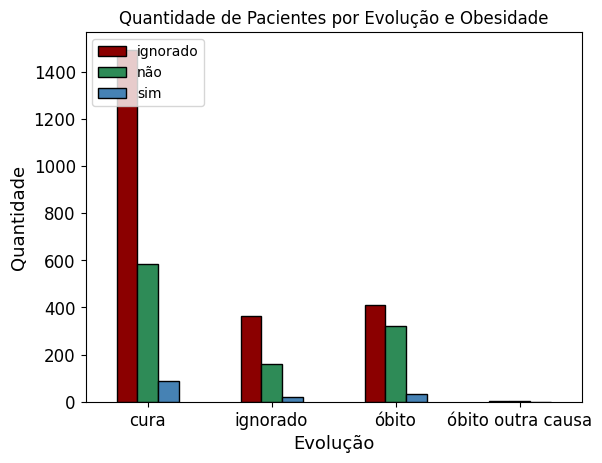

In [ ]:
sexo_cardiopati = (df_covid[['evolucao','obesidade']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Evolução', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Obesidade")

In [ ]:
pd.crosstab(df_covid['obesidade'],df_covid['covid'])

covid,outra causa,sim
obesidade,,
ignorado,1067,1204
não,518,553
sim,42,98


Text(0.5, 1.0, 'Quantidade de Pacientes por Covid e Obesidade')

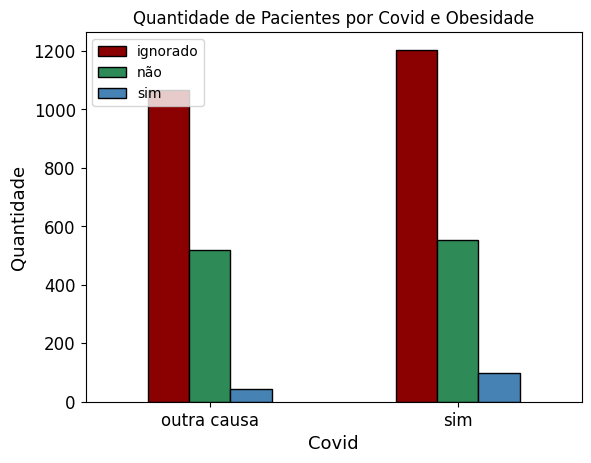

In [ ]:
sexo_cardiopati = (df_covid[['covid','obesidade']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Covid', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Covid e Obesidade")

In [ ]:
pd.crosstab(df_covid['obesidade'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
obesidade,,,,,
ignorado,436,386,295,670,484
não,192,207,103,385,184
sim,28,17,16,45,34


Text(0.5, 1.0, 'Quantidade de Pacientes por Distrito e Obesidade')

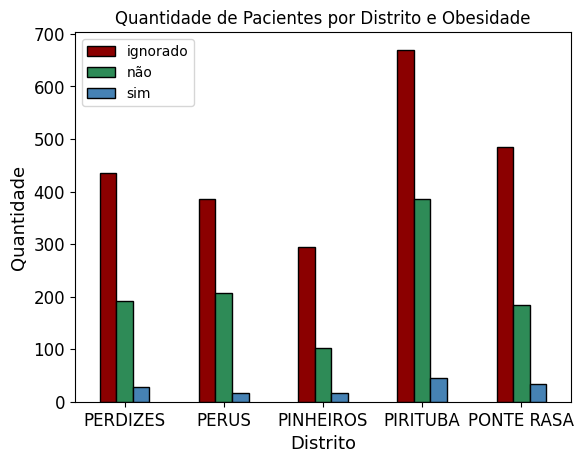

In [ ]:
sexo_cardiopati = (df_covid[['distrito','obesidade']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Distrito e Obesidade")

In [ ]:
pd.crosstab(df_covid['uti'],df_covid['suportvent'])

suportvent,ignorado,invasivo,não,não invasivo
uti,,,,
ignorado,286,16,81,100
não,177,66,803,862
sim,51,381,203,456


Text(0.5, 1.0, 'Quantidade de Pacientes por Suporte Ventilatório e UTI')

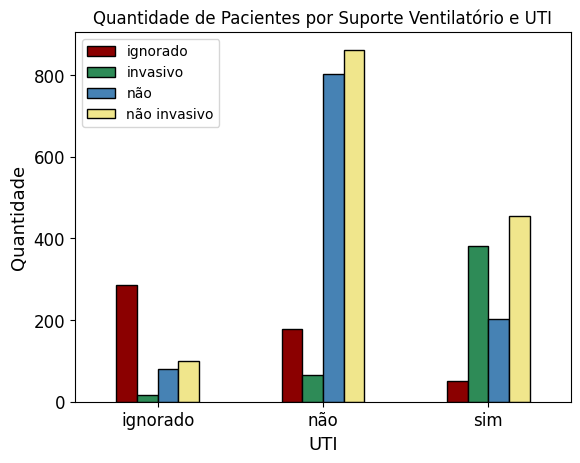

In [ ]:
sexo_cardiopati = (df_covid[['uti','suportvent']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('UTI', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Suporte Ventilatório e UTI")

In [ ]:
pd.crosstab(df_covid['uti'],df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
uti,,,,
ignorado,281,92,110,0
não,1344,297,265,2
sim,538,156,391,6


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e UTI')

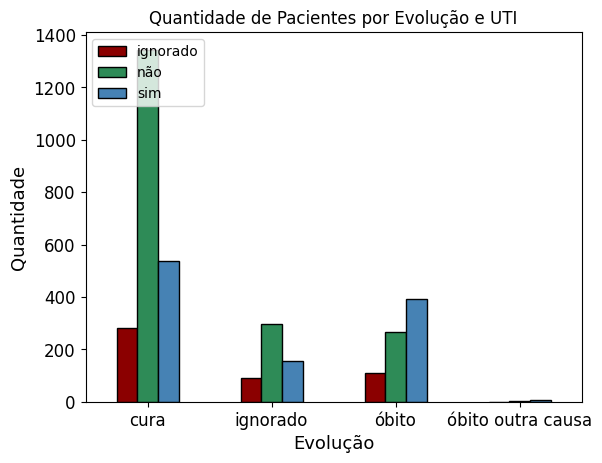

In [ ]:
sexo_cardiopati = (df_covid[['evolucao','uti']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Evolução', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e UTI")

In [ ]:
pd.crosstab(df_covid['uti'],df_covid['covid'])

covid,outra causa,sim
uti,,
ignorado,308,175
não,854,1054
sim,465,626


Text(0.5, 1.0, 'Quantidade de Pacientes por Covid e UTI')

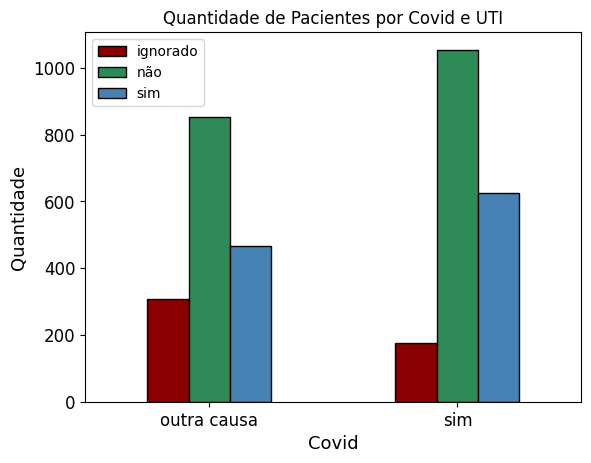

In [ ]:
sexo_cardiopati = (df_covid[['covid','uti']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Covid', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Covid e UTI")

In [ ]:
pd.crosstab(df_covid['uti'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
uti,,,,,
ignorado,60,182,37,114,90
não,367,281,222,658,380
sim,229,147,155,328,232


Text(0.5, 1.0, 'Quantidade de Pacientes por Distrito e UTI')

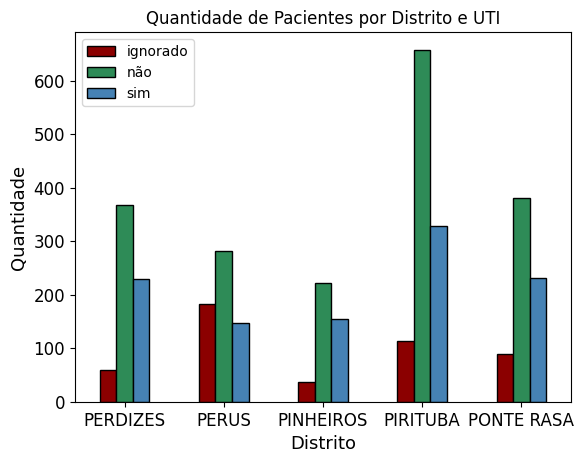

In [ ]:
sexo_cardiopati = (df_covid[['distrito','uti']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Distrito e UTI")

In [ ]:
pd.crosstab(df_covid['suportvent'],df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
suportvent,,,,
ignorado,311,105,98,0
invasivo,134,44,281,4
não,777,185,124,1
não invasivo,941,211,263,3


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Suporte Ventilatório')

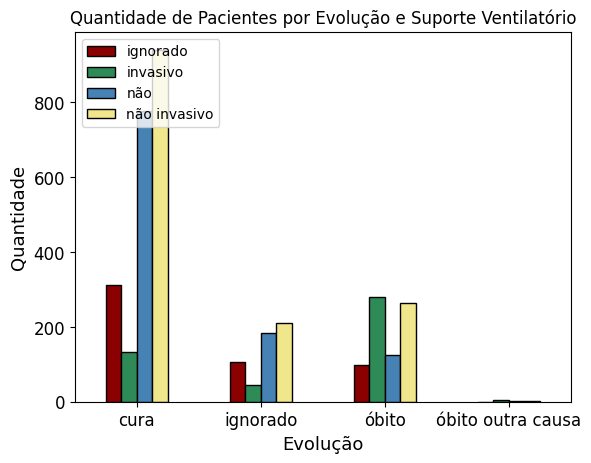

In [ ]:
sexo_cardiopati = (df_covid[['evolucao','suportvent']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Evolução', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Suporte Ventilatório")

In [ ]:
pd.crosstab(df_covid['suportvent'],df_covid['covid'])

covid,outra causa,sim
suportvent,,
ignorado,324,190
invasivo,187,276
não,534,553
não invasivo,582,836


Text(0.5, 1.0, 'Quantidade de Pacientes por Covid e Suporte Ventilatório')

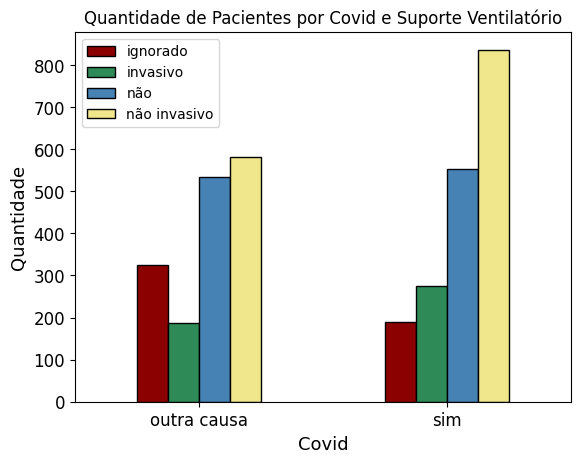

In [ ]:
sexo_cardiopati = (df_covid[['covid','suportvent']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Covid', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Covid e Suporte Ventilatório")

In [ ]:
pd.crosstab(df_covid['suportvent'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
suportvent,,,,,
ignorado,65,205,41,109,94
invasivo,79,84,51,152,97
não,224,137,138,365,223
não invasivo,288,184,184,474,288


Text(0.5, 1.0, 'Quantidade de Pacientes por Distrito e Suporte Ventilatório')

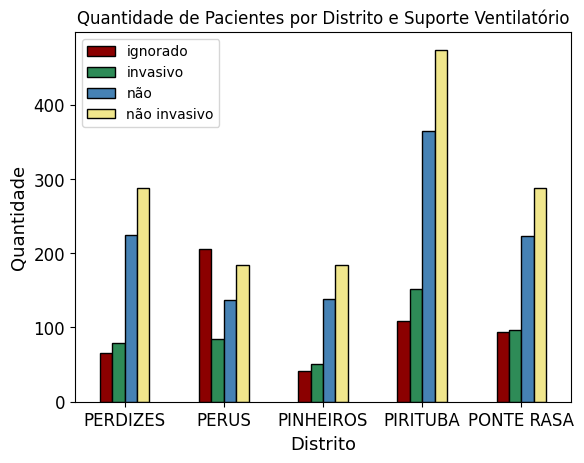

In [ ]:
sexo_cardiopati = (df_covid[['distrito','suportvent']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Distrito e Suporte Ventilatório")

Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Distrito')

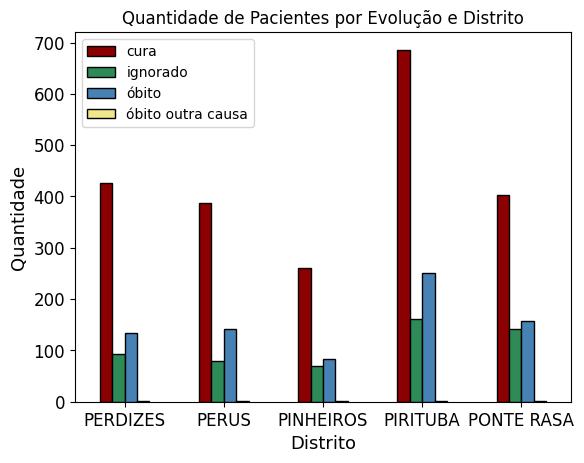

In [ ]:
sexo_cardiopati = (df_covid[['distrito','evolucao']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Distrito")

In [ ]:
pd.crosstab(df_covid['evolucao'],df_covid['covid'])

covid,outra causa,sim
evolucao,,
cura,940,1223
ignorado,376,169
óbito,304,462
óbito outra causa,7,1


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Covid')

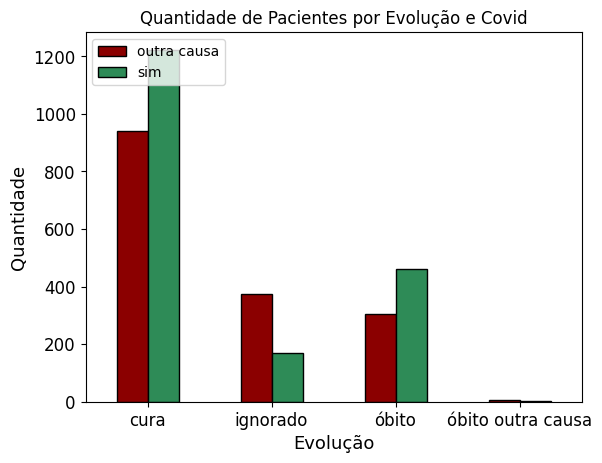

In [ ]:
sexo_cardiopati = (df_covid[['evolucao','covid']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Evolução', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Covid")

In [ ]:
pd.crosstab(df_covid['evolucao'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
evolucao,,,,,
cura,427,388,260,686,402
ignorado,93,80,69,162,141
óbito,134,141,84,250,157
óbito outra causa,2,1,1,2,2


Text(0.5, 1.0, 'Quantidade de Pacientes por Evolução e Distrito')

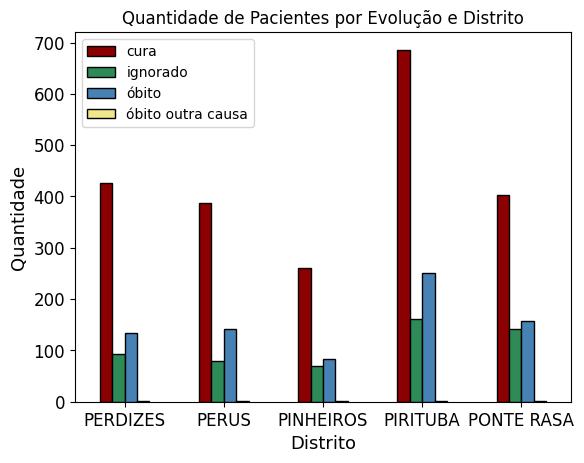

In [ ]:
sexo_cardiopati = (df_covid[['distrito','evolucao']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#8B0000','#2E8B57','#4682B4','#F0E68C'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Evolução e Distrito")

In [ ]:
pd.crosstab(df_covid['covid'],df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
covid,,,,,
outra causa,291,313,169,548,306
sim,365,297,245,552,396


Text(0.5, 1.0, 'Quantidade de Pacientes por Covid e Distrito')

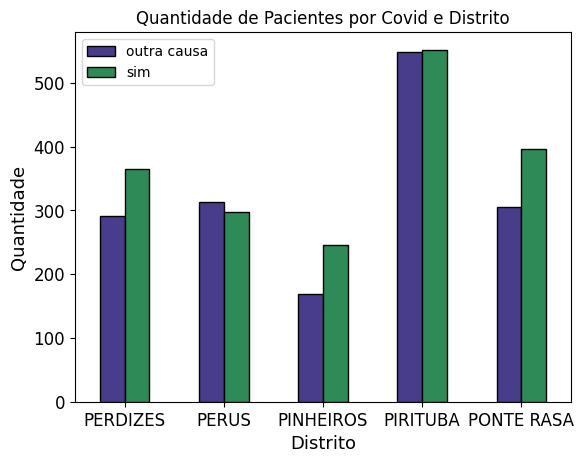

In [ ]:
sexo_cardiopati = (df_covid[['distrito','covid']].value_counts())
sexo_cardiopati.unstack().plot.bar(color=['#483D8B','#2E8B57'], ec='k')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=2)
plt.xlabel('Distrito', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.title("Quantidade de Pacientes por Covid e Distrito")

#Análise de Variáveis Qualitativas com Quantitativas

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=5),df_covid['sexo'])

sexo,F,M
idade,,
"(-0.106, 21.2]",107,101
"(21.2, 42.4]",243,285
"(42.4, 63.6]",458,656
"(63.6, 84.8]",620,624
"(84.8, 106.0]",234,154


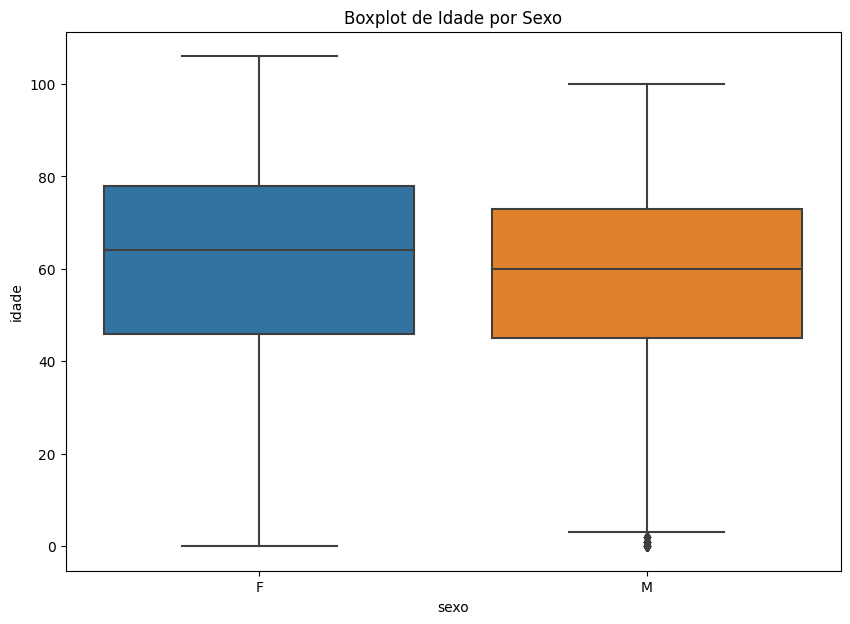

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='sexo', y='idade', data=df_covid)
plt.title('Boxplot de Idade por Sexo')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['cardiopati'])

cardiopati,ignorado,não,sim
idade,,,
"(-0.106, 35.333]",392,72,17
"(35.333, 70.667]",932,272,607
"(70.667, 106.0]",361,152,677


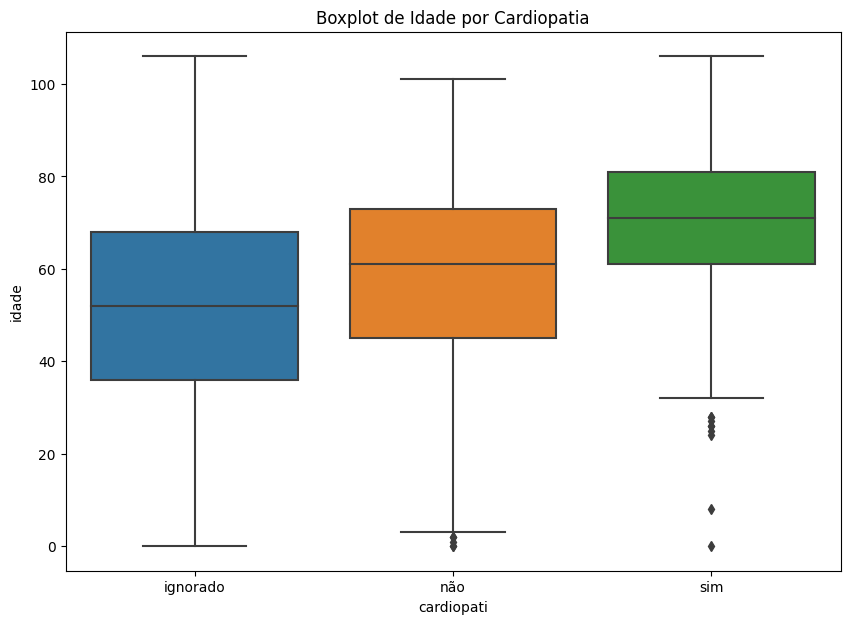

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='cardiopati', y='idade', data=df_covid)
plt.title('Boxplot de Idade por Cardiopatia')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['diabetes'])

diabetes,ignorado,não,sim
idade,,,
"(-0.106, 35.333]",391,78,12
"(35.333, 70.667]",1038,374,399
"(70.667, 106.0]",531,290,369


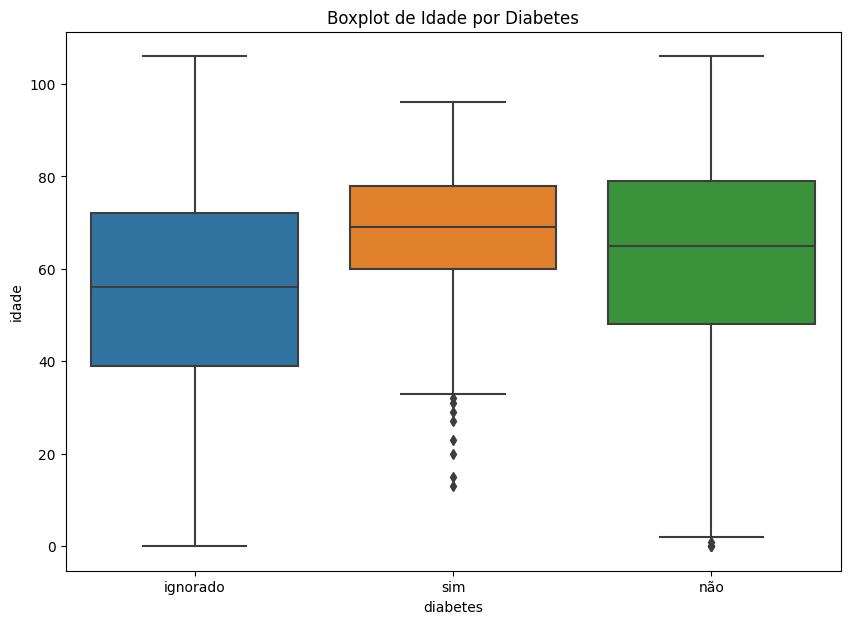

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='diabetes', y='idade', data=df_covid)
plt.title('Boxplot de Idade por Diabetes')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['renal'])

renal,ignorado,não,sim
idade,,,
"(-0.106, 35.333]",397,80,4
"(35.333, 70.667]",1176,564,71
"(70.667, 106.0]",647,442,101


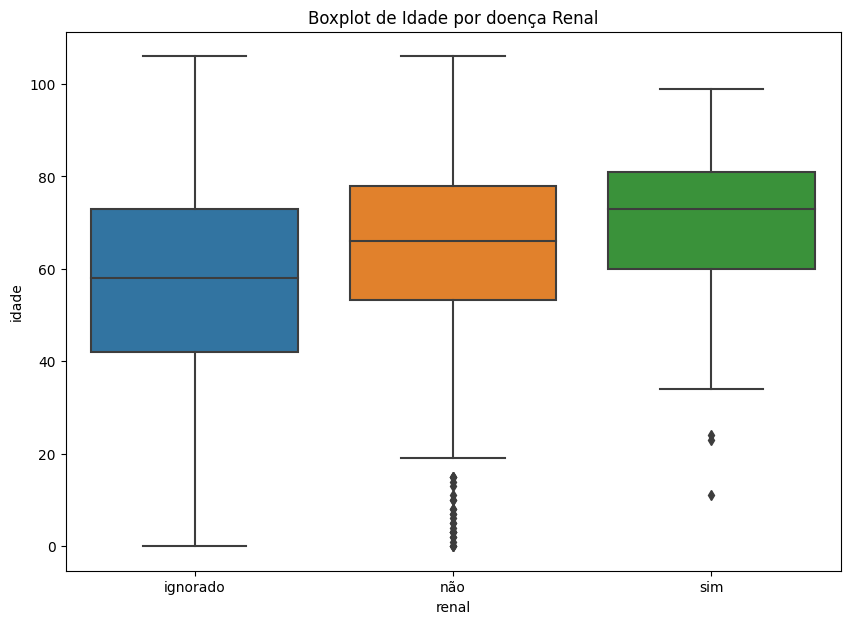

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='renal', y='idade', data=df_covid)
plt.title('Boxplot de Idade por doença Renal')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['obesidade'])

obesidade,ignorado,não,sim
idade,,,
"(-0.106, 35.333]",388,74,19
"(35.333, 70.667]",1190,530,91
"(70.667, 106.0]",693,467,30


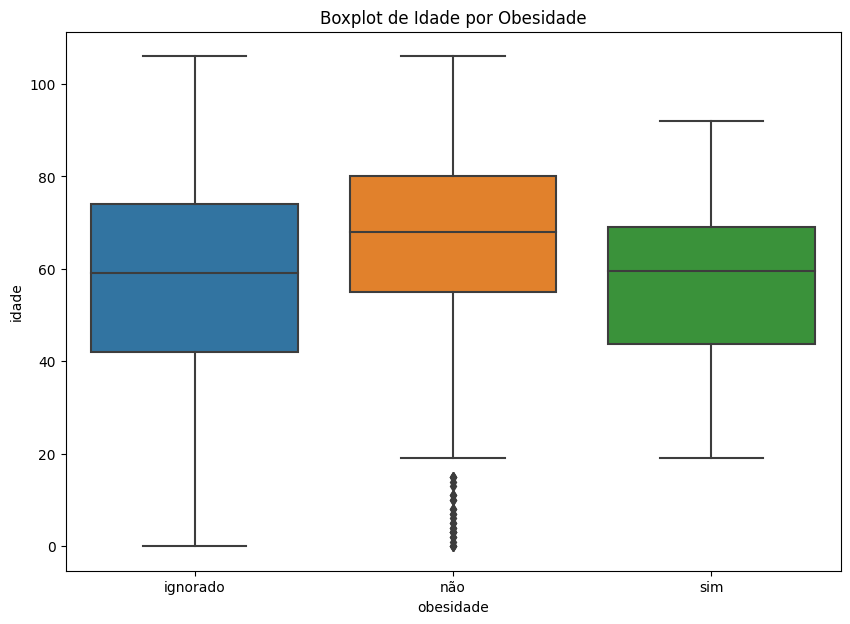

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='obesidade', y='idade', data=df_covid)
plt.title('Boxplot de Idade por Obesidade')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['uti'])

uti,ignorado,não,sim
idade,,,
"(-0.106, 35.333]",85,276,120
"(35.333, 70.667]",242,1027,542
"(70.667, 106.0]",156,605,429


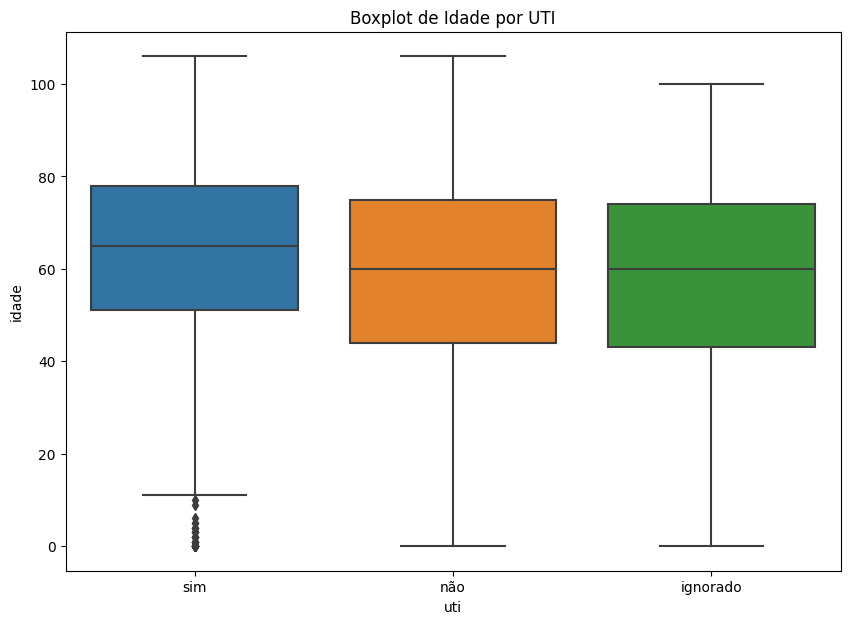

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='uti', y='idade', data=df_covid)
plt.title('Boxplot de Idade por UTI')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['suportvent'])

suportvent,ignorado,invasivo,não,não invasivo
idade,,,,
"(-0.106, 35.333]",101,35,219,126
"(35.333, 70.667]",260,236,581,734
"(70.667, 106.0]",153,192,287,558


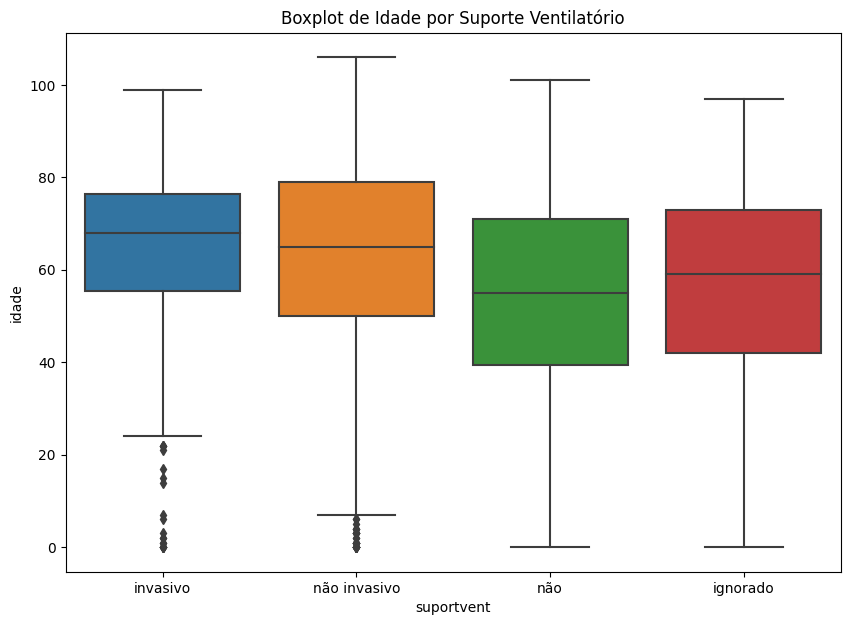

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='suportvent', y='idade', data=df_covid)
plt.title('Boxplot de Idade por Suporte Ventilatório')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
idade,,,,
"(-0.106, 35.333]",386,70,25,0
"(35.333, 70.667]",1227,300,282,2
"(70.667, 106.0]",550,175,459,6


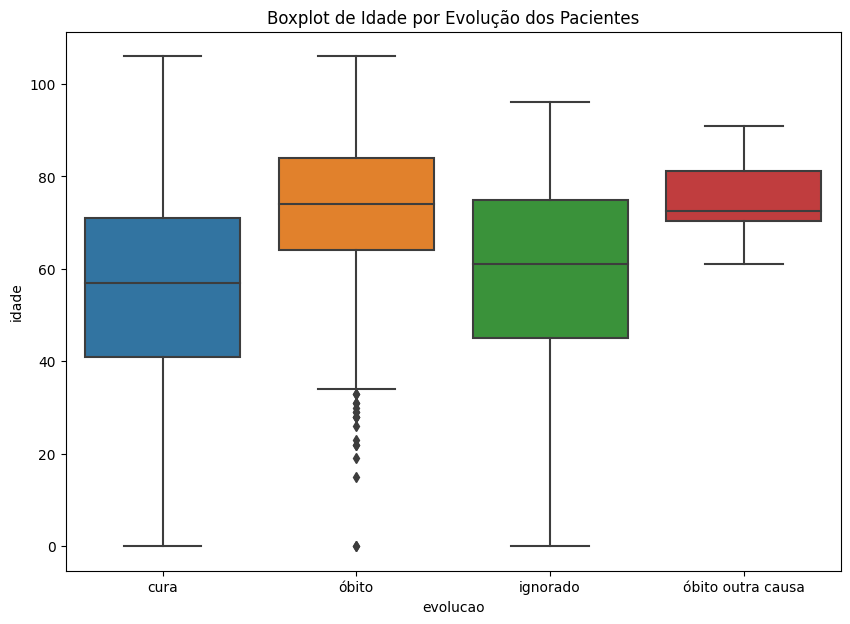

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='evolucao', y='idade', data=df_covid)
plt.title('Boxplot de Idade por Evolução dos Pacientes')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['covid'])

covid,outra causa,sim
idade,,
"(-0.106, 35.333]",344,137
"(35.333, 70.667]",731,1080
"(70.667, 106.0]",552,638


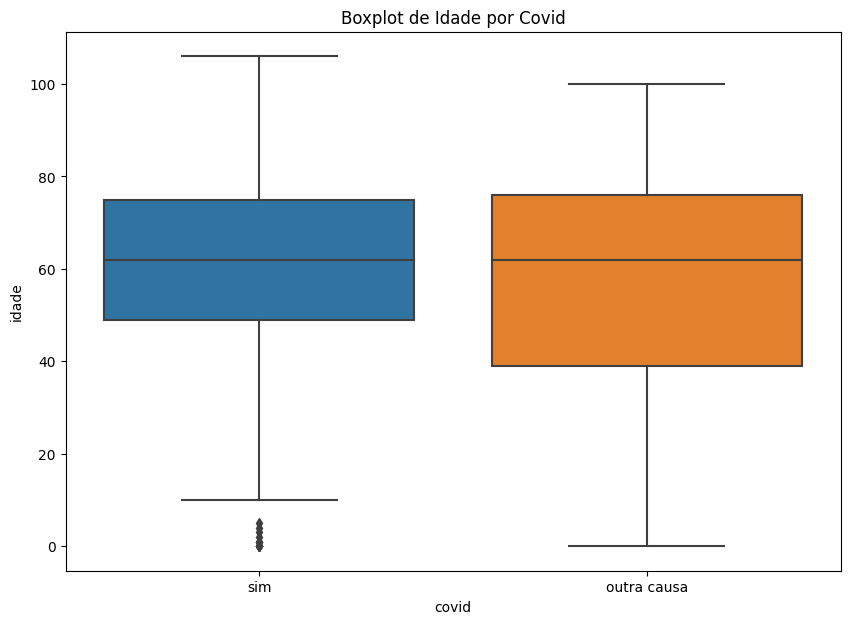

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='covid', y='idade', data=df_covid)
plt.title('Boxplot de Idade por Covid')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['idade'],bins=3),df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
idade,,,,,
"(-0.106, 35.333]",72,109,36,188,76
"(35.333, 70.667]",262,370,147,628,404
"(70.667, 106.0]",322,131,231,284,222


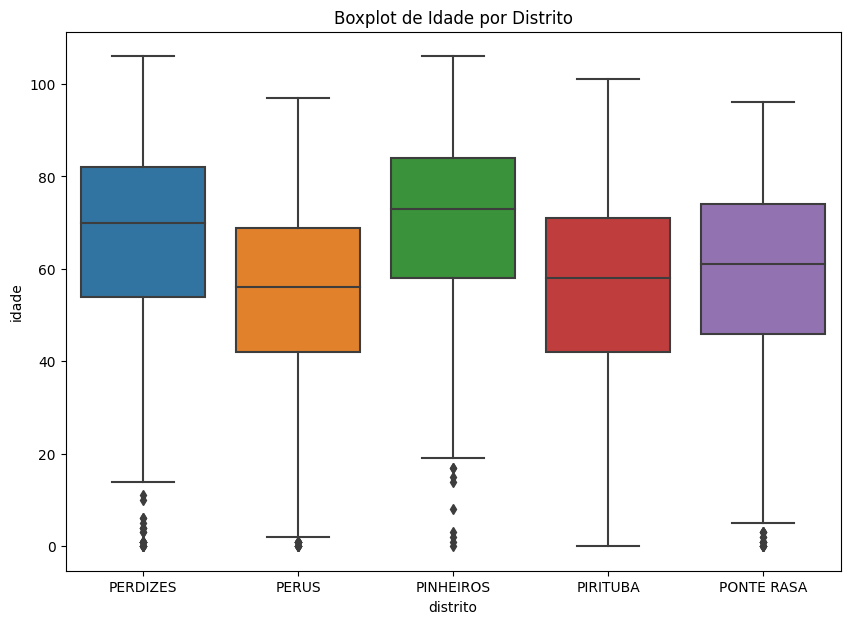

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='distrito', y='idade', data=df_covid)
plt.title('Boxplot de Idade por Distrito')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['sexo'])

sexo,F,M
ivs,,
"(0.0396, 0.179]",634,626
"(0.179, 0.319]",777,940
"(0.319, 0.458]",251,254


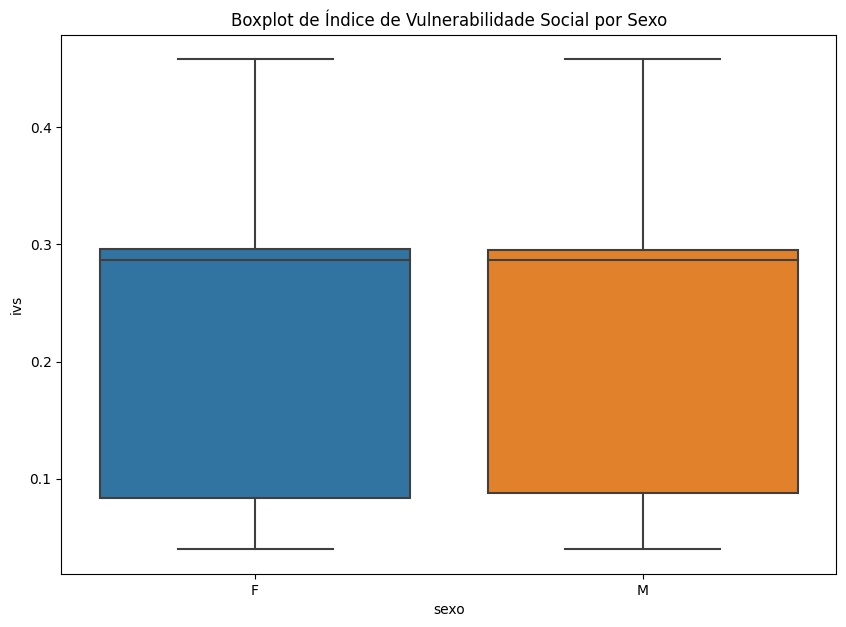

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='sexo', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Sexo')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['cardiopati'])

cardiopati,ignorado,não,sim
ivs,,,
"(0.0396, 0.179]",586,151,523
"(0.179, 0.319]",862,258,597
"(0.319, 0.458]",237,87,181


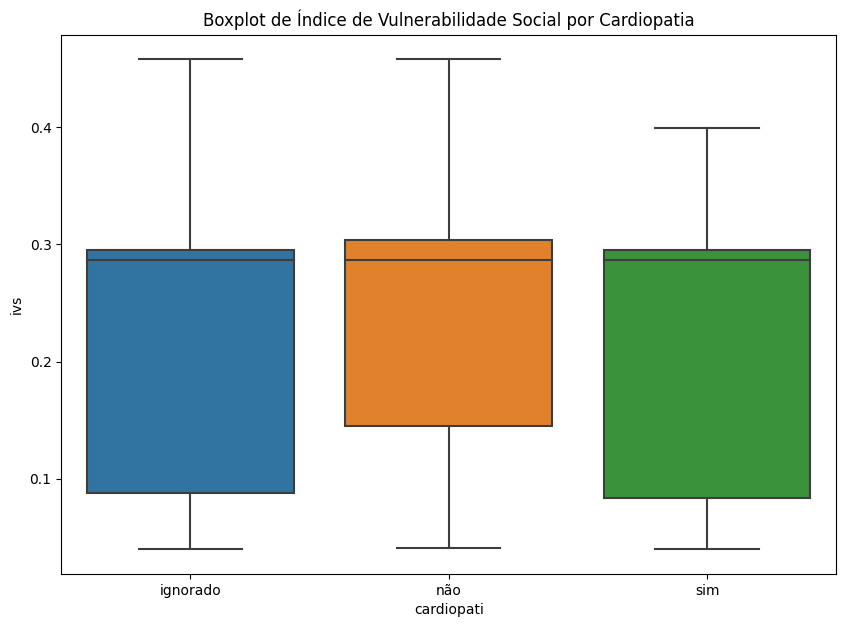

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='cardiopati', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Cardiopatia')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['diabetes'])

diabetes,ignorado,não,sim
ivs,,,
"(0.0396, 0.179]",732,267,261
"(0.179, 0.319]",966,357,394
"(0.319, 0.458]",262,118,125


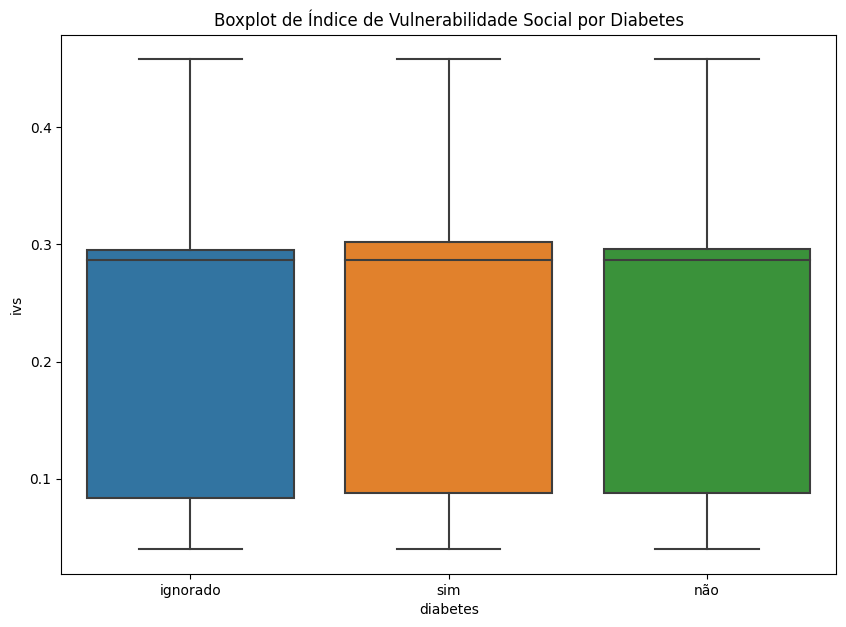

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='diabetes', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Diabetes')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['renal'])

renal,ignorado,não,sim
ivs,,,
"(0.0396, 0.179]",821,370,69
"(0.179, 0.319]",1100,527,90
"(0.319, 0.458]",299,189,17


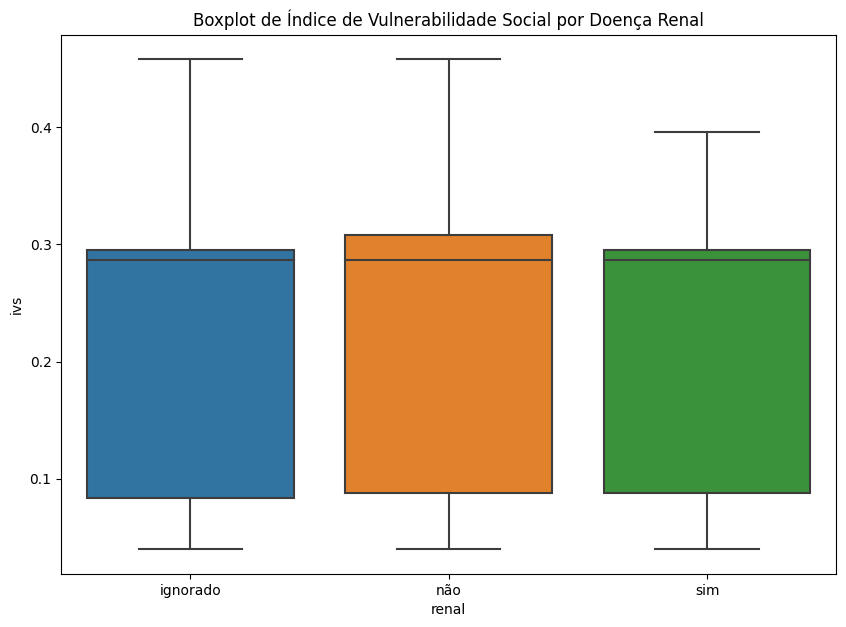

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='renal', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Doença Renal')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['obesidade'])

obesidade,ignorado,não,sim
ivs,,,
"(0.0396, 0.179]",844,365,51
"(0.179, 0.319]",1125,521,71
"(0.319, 0.458]",302,185,18


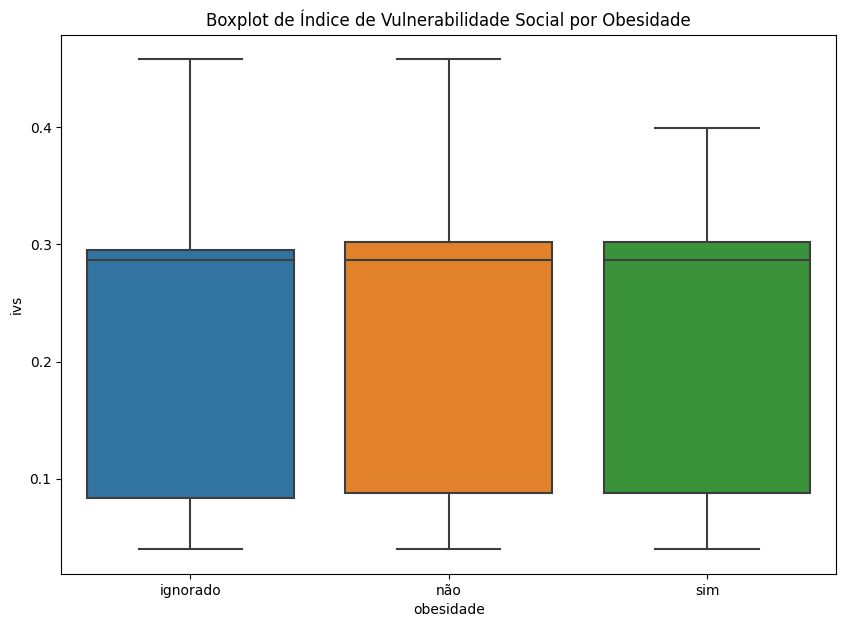

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='obesidade', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Obesidade')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['uti'])

uti,ignorado,não,sim
ivs,,,
"(0.0396, 0.179]",114,703,443
"(0.179, 0.319]",256,953,508
"(0.319, 0.458]",113,252,140


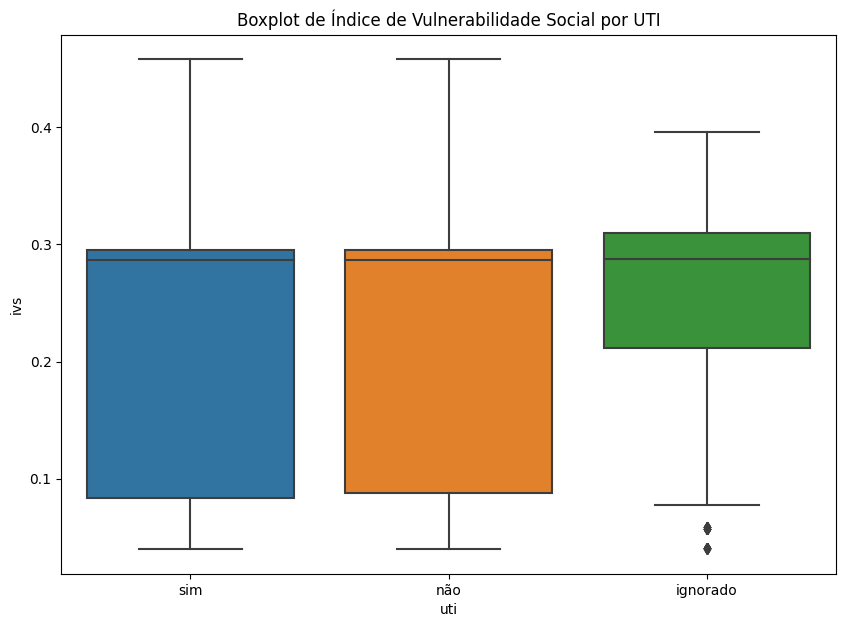

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='uti', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por UTI')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['suportvent'])

suportvent,ignorado,invasivo,não,não invasivo
ivs,,,,
"(0.0396, 0.179]",119,158,436,547
"(0.179, 0.319]",266,230,536,685
"(0.319, 0.458]",129,75,115,186


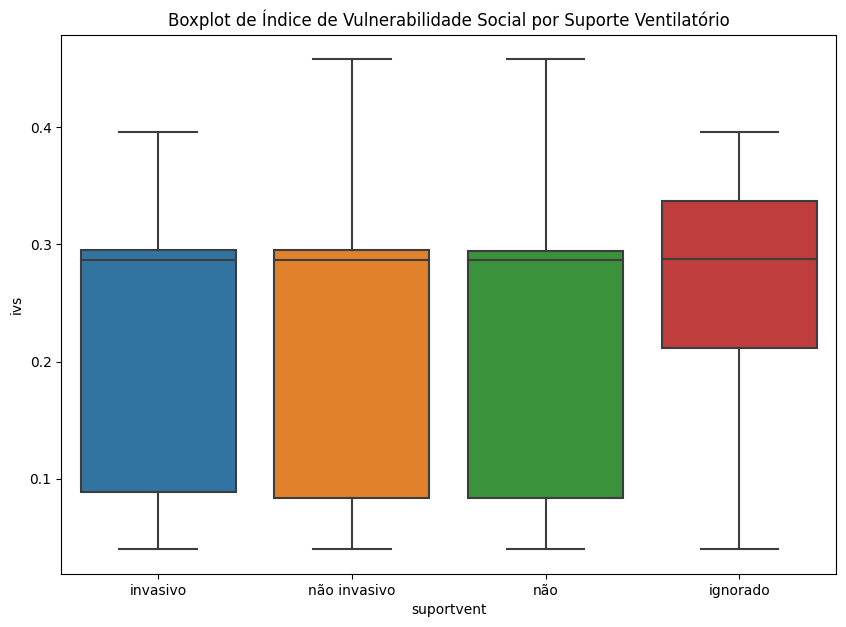

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='suportvent', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Suporte Ventilatório')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['evolucao'])

evolucao,cura,ignorado,óbito,óbito outra causa
ivs,,,,
"(0.0396, 0.179]",807,193,256,4
"(0.179, 0.319]",1032,284,399,2
"(0.319, 0.458]",324,68,111,2


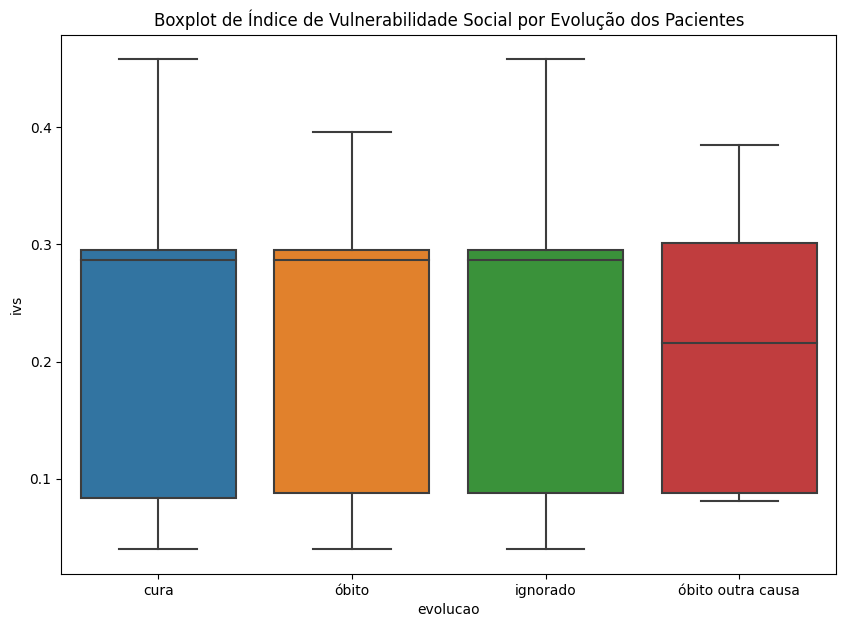

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='evolucao', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Evolução dos Pacientes')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=3),df_covid['covid'])

covid,outra causa,sim
ivs,,
"(0.0396, 0.179]",545,715
"(0.179, 0.319]",827,890
"(0.319, 0.458]",255,250


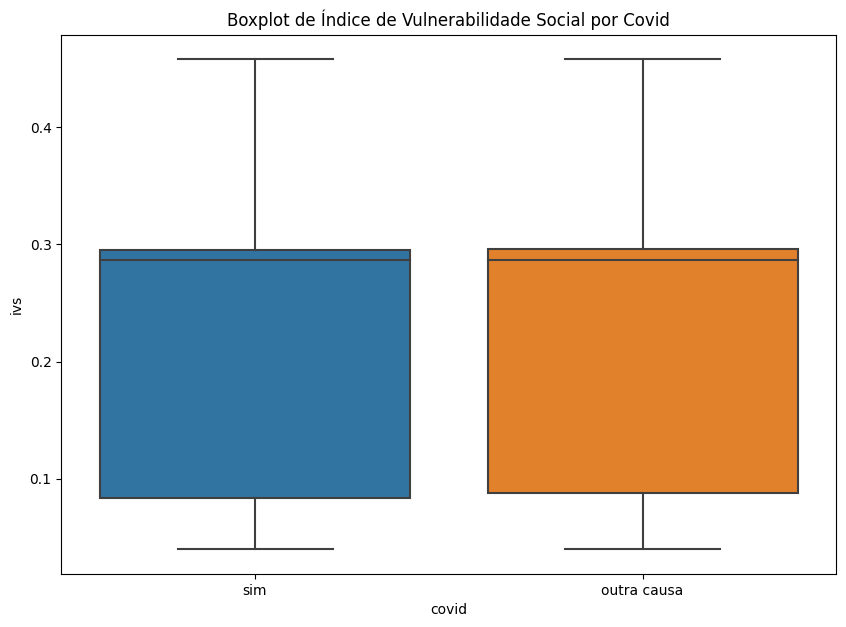

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='covid', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Covid')
plt.show()

In [ ]:
pd.crosstab(pd.cut(df_covid['ivs'],bins=4),df_covid['distrito'])

distrito,PERDIZES,PERUS,PINHEIROS,PIRITUBA,PONTE RASA
ivs,,,,,
"(0.0396, 0.145]",638,0,414,0,0
"(0.145, 0.249]",18,0,0,297,31
"(0.249, 0.354]",0,282,0,667,667
"(0.354, 0.458]",0,328,0,136,4


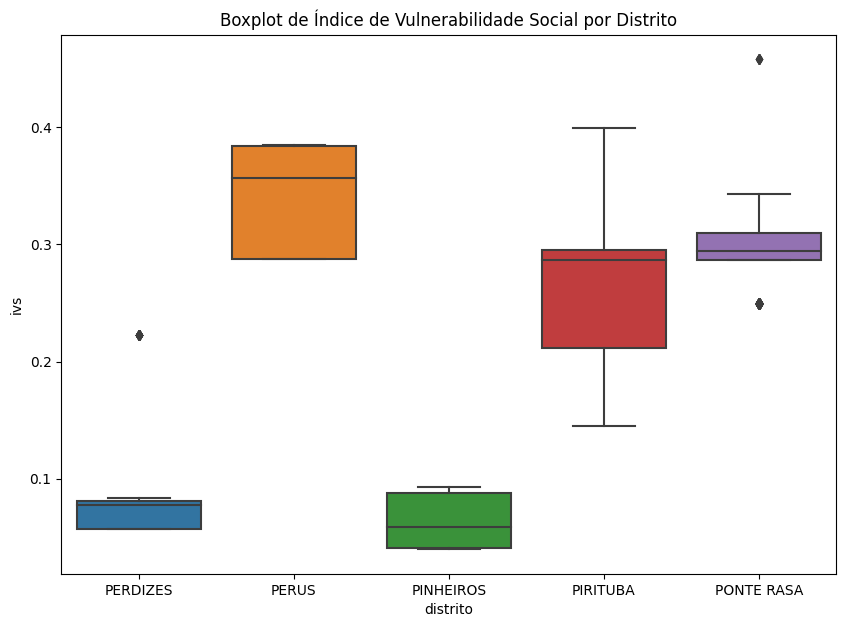

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='distrito', y='ivs', data=df_covid)
plt.title('Boxplot de Índice de Vulnerabilidade Social por Distrito')
plt.show()

#Regressão Linear


In [ ]:
sexo = {
    "M": 1,
    "F": 2
}
distrito = {
    "PERDIZES": 1,
    "PERUS": 2,
    "PINHEIROS": 3,
    "PIRITUBA": 4,
    "PONTE RASA": 5
}

In [ ]:
col_sexo = df_covid_num['sexo']
col_sexo = col_sexo.map(sexo)
df_covid_num['sexo'] = col_sexo
df_covid_num.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,2,55.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,1.0,PERDIZES,0.084
1,1,4.0,9.0,9.0,9.0,9.0,1.0,2.0,1.0,0.0,PERDIZES,0.057
2,1,18.0,9.0,9.0,9.0,9.0,2.0,3.0,1.0,0.0,PERDIZES,0.084
3,2,73.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,PERDIZES,0.057
4,1,90.0,9.0,9.0,9.0,9.0,1.0,1.0,2.0,1.0,PERDIZES,0.081


In [ ]:
col_distrito = df_covid_num['distrito']
col_distrito = col_distrito.map(distrito)
df_covid_num['distrito'] = col_distrito
df_covid_num.head()

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
0,2,55.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,1.0,1,0.084
1,1,4.0,9.0,9.0,9.0,9.0,1.0,2.0,1.0,0.0,1,0.057
2,1,18.0,9.0,9.0,9.0,9.0,2.0,3.0,1.0,0.0,1,0.084
3,2,73.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1,0.057
4,1,90.0,9.0,9.0,9.0,9.0,1.0,1.0,2.0,1.0,1,0.081


In [ ]:
X = df_covid_num.drop('evolucao', axis=1)
y = df_covid_num['evolucao']
X = sm.add_constant(X)
#Ajuste o modelo
model = sm.OLS(y, X)
results = model.fit()

#Imprima o resumo das estatísticas do modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               evolucao   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     14.41
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.30e-27
Time:                        02:06:12   Log-Likelihood:                -8497.5
No. Observations:                3482   AIC:                         1.702e+04
Df Residuals:                    3470   BIC:                         1.709e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2653      0.286      7.920      0.0

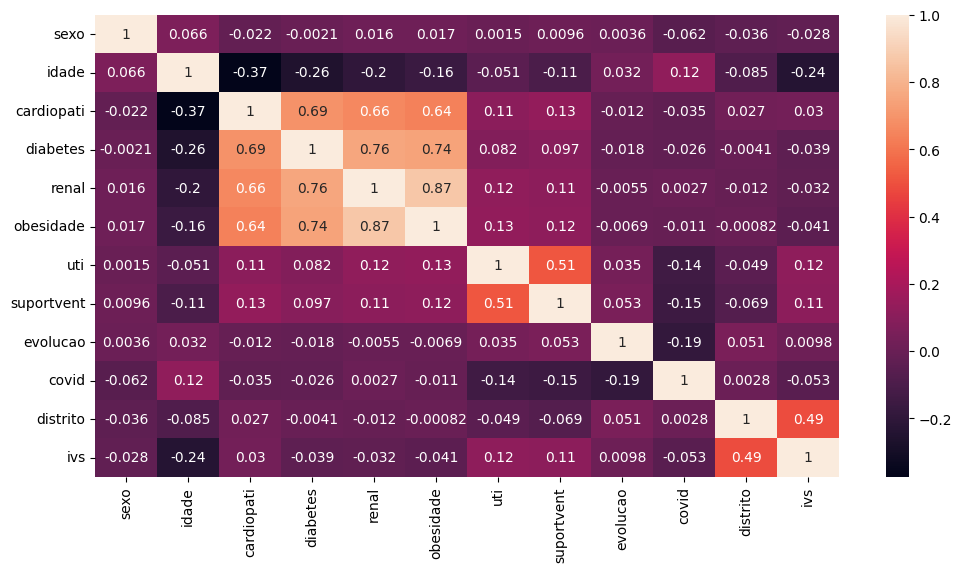

In [ ]:
corr_df = df_covid_num.corr(method='pearson')

plt.figure(figsize=(12, 6))
sns.heatmap(corr_df, annot=True)
plt.show()